In [1]:
import pandas as pd
df = pd.read_csv("stagingZone/Estacion_Meteologica.csv")

In [2]:
columnas_fecha = ['fecha_hora']  

for columna in columnas_fecha:
    try:
        df[columna] = pd.to_datetime(df[columna], errors='coerce')
    except Exception as e:
        print(f"Error al convertir la columna {columna}: {e}")

In [3]:
df['día'] = df['fecha_hora'].dt.day
df['mes'] = df['fecha_hora'].dt.month
df['año'] = df['fecha_hora'].dt.year
df['hora'] = df['fecha_hora'].dt.hour
df['minuto'] = df['fecha_hora'].dt.minute
df = df[(df["calidad"]==2)|(df["calidad"]==1)]


In [129]:
df_completo['h'] = df_completo['h'].interpolate(method='polynomial', order=2)  
df_completo['t'] = df_completo['t'].interpolate(method='polynomial', order=2)  
df_completo['vv'] = df_completo['vv'].interpolate(method='polynomial', order=2)  
df_completo['vv_max'] = df_completo['vv_max'].interpolate(method='polynomial', order=2)  
df_completo['pr'] = df_completo['pr'].interpolate(method='polynomial', order=2)  
df_completo['dv'] = df_completo['dv'].interpolate(method='polynomial', order=2)  
df_completo['dv_max'] = df_completo['dv_max'].interpolate(method='polynomial', order=2)  


In [130]:
df_completo['fecha_hora'] = df_completo['fecha_hora'].dt.floor('15min')
df_completo = df_completo.groupby(['codigo', 'fecha_hora']).agg(
    h_promedio=('h', 'mean'),
    h_std=('h', 'std'),
    t_promedio=('t', 'mean'),
    t_std=('t', 'std'),
    pr_promedio=('pr', 'mean'),
    pr_std=('pr', 'std'),
    vv_promedio=('vv', 'mean'),
    vv_std=('vv', 'std'),
    dv_promedio=('dv', 'mean'),
    dv_std=('dv', 'std'),
    dv_max_promedio=('dv_max', 'mean'),
    dv_max_std=('dv_max', 'std'),
)

df_completo = df_completo.reset_index()
df_completo

,codigo,fecha_hora,h_promedio,h_std,t_promedio,t_std,pr_promedio,pr_std,vv_promedio,vv_std,dv_promedio,dv_std,dv_max_promedio,dv_max_std
0,197,2018-02-07 13:30:00,32.670000,NaN,29.300000,NaN,840.310000,NaN,1.080000,NaN,337.000000,NaN,213.000000,NaN
1,197,2018-02-07 13:45:00,31.375862,0.936731,29.796483,0.316952,840.137229,0.109300,1.324943,0.489851,291.747174,52.384879,220.685109,55.081570
2,197,2018-02-07 14:00:00,30.601047,0.650628,30.414785,0.115748,839.861101,0.068120,1.133675,0.325426,159.926235,182.268828,212.829333,29.965162
3,197,2018-02-07 14:15:00,30.201864,0.391757,30.550955,0.115516,839.658555,0.063916,0.887852,0.383549,95.657155,89.854648,223.411094,30.068223
4,197,2018-02-07 14:30:00,30.583730,0.923882,30.839255,0.176911,839.466640,0.058991,0.949683,0.587918,128.855795,86.925509,172.606847,112.486572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628223,419,2024-07-31 22:45:00,70.960000,0.116435,22.024667,0.068020,851.208000,0.035697,6.362667,0.808883,20.533333,5.040786,18.733333,6.912377
1628224,419,2024-07-31 23:00:00,71.000000,0.000000,21.780667,0.113293,851.453333,0.058757,4.974000,1.329435,54.666667,83.726312,52.600000,86.510776
1628225,419,2024-07-31 23:15:00,71.109333,0.261273,21.568000,0.091277,851.491333,0.028502,4.224000,1.198504,41.200000,22.621734,43.400000,27.606417
1628226,419,2024-07-31 23:30:00,71.546000,0.224429,21.392000,0.039677,851.422000,0.061319,5.230000,1.375422,25.200000,10.718475,25.533333,15.954698


In [77]:
df.columns

Index(['codigo', 'fecha_hora', 'h_promedio', 'h_std', 't_promedio', 't_std',
       'pr_promedio', 'pr_std', 'vv_promedio', 'vv_std', 'dv_promedio',
       'dv_std', 'dv_max_promedio', 'dv_max_std', 'diferencia_tiempo', 'día',
       'mes', 'año', 'hora', 'minuto'],
      dtype='object')

In [84]:
nulos_por_columna = df_completo.isnull().sum()

# Mostrar el número de nulos por columna
print(nulos_por_columna)

codigo               0
fecha_hora           0
h_promedio           0
h_std                0
t_promedio           0
t_std                0
pr_promedio          0
pr_std               0
vv_promedio          0
vv_std               0
dv_promedio          0
dv_std               0
dv_max_promedio      0
dv_max_std           0
diferencia_tiempo    6
día                  0
mes                  0
año                  0
hora                 0
minuto               0
dtype: int64


In [128]:
df_completo['h_promedio'] = df_completo['h_promedio'].interpolate(method='polynomial', order=2)  
df_completo['h_std'] = df_completo['h_std'].interpolate(method='polynomial', order=2)  
df_completo['t_promedio'] = df_completo['t_promedio'].interpolate(method='polynomial', order=2)  
df_completo['t_std'] = df_completo['t_std'].interpolate(method='polynomial', order=2)  
df_completo['pr_promedio'] = df_completo['pr_promedio'].interpolate(method='polynomial', order=2)  
df_completo['pr_std'] = df_completo['pr_std'].interpolate(method='polynomial', order=2)  
df_completo['vv_promedio'] = df_completo['vv_promedio'].interpolate(method='polynomial', order=2)  
df_completo['vv_std'] = df_completo['vv_std'].interpolate(method='polynomial', order=2)  
df_completo['dv_promedio'] = df_completo['dv_promedio'].interpolate(method='polynomial', order=2)  
df_completo['dv_std'] = df_completo['dv_std'].interpolate(method='polynomial', order=2)  
df_completo['dv_max_promedio'] = df_completo['dv_max_promedio'].interpolate(method='polynomial', order=2)  
df_completo['dv_max_std'] = df_completo['dv_max_std'].interpolate(method='polynomial', order=2)  




KeyError: 'h_promedio'

In [74]:
import pandas as pd


df = df.dropna()
df = df.sort_values(by=['codigo', 'fecha_hora']).reset_index(drop=True)

df['diferencia_tiempo'] = df.groupby('codigo')['fecha_hora'].diff().dt.total_seconds() / 60

saltos_minuto = df[(df['diferencia_tiempo'] != 15) & (df['diferencia_tiempo'].notnull())]

saltos_minuto['intervalos_15_min_faltantes'] = ((saltos_minuto['diferencia_tiempo'] - 15) / 15).apply(lambda x: max(0, x))

total_intervalos_15_min_faltantes = saltos_minuto['intervalos_15_min_faltantes'].sum()

porcentaje_faltante = (total_intervalos_15_min_faltantes / len(df)) * 100

# Mostrar resultados
print(f"Total de intervalos de 15 minutos faltantes: {total_intervalos_15_min_faltantes}")
print(f"Porcentaje de intervalos faltantes: {porcentaje_faltante:.2f}%")

# Mostrar registros con saltos en el tiempo
print("Registros con intervalos irregulares:")
saltos_minuto[['codigo', 'fecha_hora', 'diferencia_tiempo', 'intervalos_15_min_faltantes']]


Total de intervalos de 15 minutos faltantes: 50260.0
Porcentaje de intervalos faltantes: 5.55%
Registros con intervalos irregulares:


C:\Users\emanu\AppData\Local\Temp\ipykernel_2572\1778675240.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saltos_minuto['intervalos_15_min_faltantes'] = ((saltos_minuto['diferencia_tiempo'] - 15) / 15).apply(lambda x: max(0, x))


,codigo,fecha_hora,diferencia_tiempo,intervalos_15_min_faltantes
45,197,2020-01-04 07:00:00,450.0,29.0
121,197,2020-01-05 07:00:00,315.0,20.0
196,197,2020-01-06 06:00:00,270.0,17.0
276,197,2020-01-07 03:00:00,75.0,4.0
278,197,2020-01-07 07:00:00,225.0,14.0
...,...,...,...,...
902061,419,2024-06-09 06:45:00,45.0,2.0
902185,419,2024-06-10 15:45:00,135.0,8.0
903413,419,2024-06-23 12:30:00,120.0,7.0
903612,419,2024-06-26 09:15:00,1155.0,76.0


In [59]:
df_sin_nulos[(df_sin_nulos.index >=160) & (df_sin_nulos.index <=176)       ]    

,codigo,fecha_hora,h_promedio,h_std,t_promedio,t_std,pr_promedio,pr_std,vv_promedio,vv_std,dv_promedio,dv_std,dv_max_promedio,dv_max_std,diferencia_tiempo
160,197,2018-02-09 05:45:00,91.585714,0.517779,16.142857,0.053452,842.142857,0.047859,1.270000,0.185113,305.142857,8.687703,231.142857,7.946248,15.0
161,197,2018-02-09 06:00:00,91.570000,0.487134,16.217273,0.073224,842.202727,0.006467,1.250000,0.091104,303.909091,6.394600,233.818182,7.345995,15.0
162,197,2018-02-09 06:15:00,91.272857,0.287965,16.275714,0.035523,842.291429,0.084741,1.321429,0.158895,297.857143,2.410295,241.428571,3.644957,15.0
163,197,2018-02-09 06:30:00,90.910000,0.155027,16.367143,0.043480,842.407143,0.012536,0.827143,0.146483,300.285714,6.102302,236.857143,14.870873,15.0
164,197,2018-02-09 06:45:00,89.503750,0.519641,16.585000,0.140204,842.465000,0.048697,0.971250,0.296525,288.625000,8.365533,244.750000,4.713203,15.0
165,197,2018-02-09 07:00:00,86.788750,0.863869,17.272500,0.184526,842.726250,0.067175,0.823750,0.134583,294.500000,13.060300,242.875000,17.033056,15.0
166,197,2018-02-09 07:15:00,83.055556,2.124848,17.916667,0.241764,842.855556,0.050525,1.078889,0.122213,297.333333,3.674235,245.111111,6.372685,15.0
167,197,2018-02-09 07:30:00,77.117778,2.130756,18.807778,0.323488,842.976667,0.081548,0.556667,0.322994,191.777778,88.925218,167.666667,90.945038,15.0
168,197,2018-02-09 07:45:00,70.614000,0.873745,19.780000,0.402057,843.138000,0.056745,0.572000,0.310918,153.000000,21.505813,192.800000,134.642861,15.0
169,197,2018-02-09 08:00:00,69.012500,1.014013,20.102500,0.216910,843.311250,0.065778,0.976250,0.629534,242.250000,120.954242,240.625000,15.873945,15.0


In [85]:
# Mirar correlaciones
df = df_completo.copy()

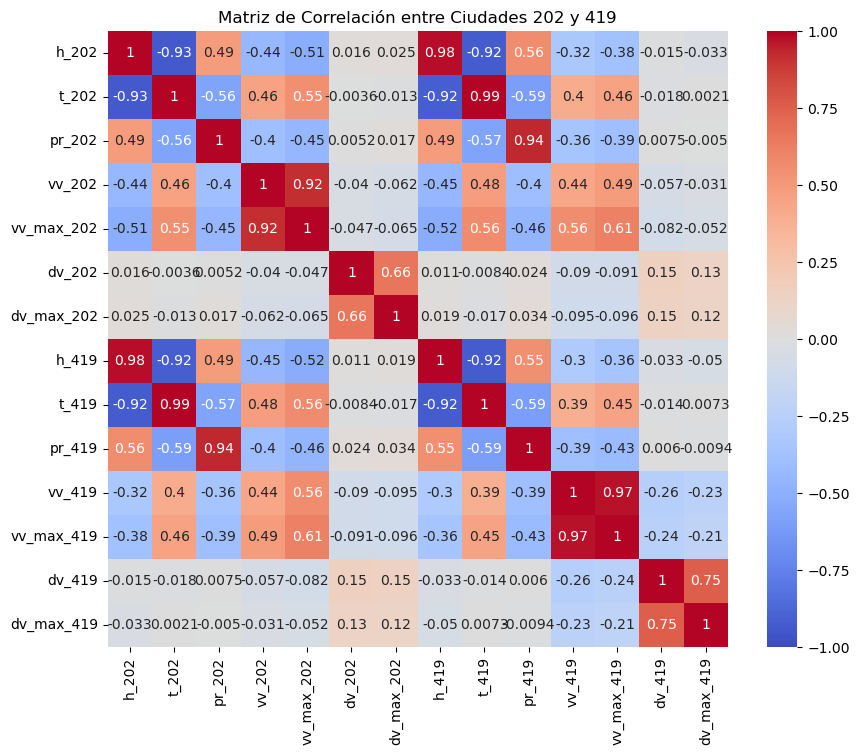

In [135]:
ciudad_202 = df[df['codigo'] == 202].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 419].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']],
    lsuffix='_202', rsuffix='_419', how='inner'
)
merged_data = merged_data.dropna()
merged_data
correlation_matrix = merged_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Ciudades 202 y 419")
plt.show()

In [5]:
codigosMedellin = [355,202,419,249,207,197]

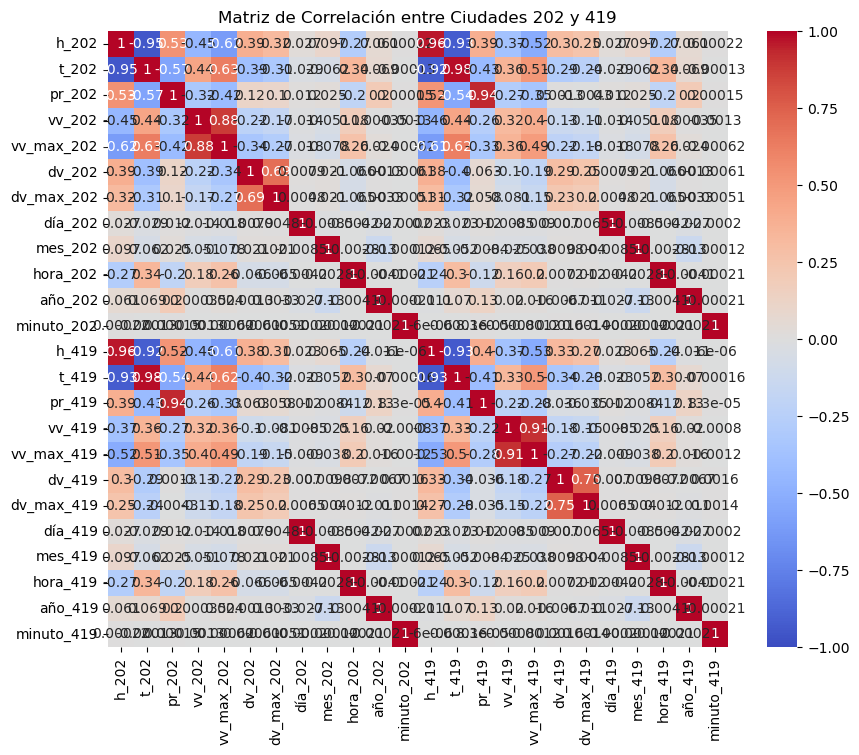

In [64]:
ciudad_202 = df[df['codigo'] == 197].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 249].set_index('fecha_hora').sort_index()
#249
merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max','día','mes','hora','año','minuto']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max','día','mes','hora','año','minuto']],
    lsuffix='_202', rsuffix='_419', how='inner'
)
merged_data = merged_data.dropna()
merged_data
correlation_matrix = merged_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Ciudades 202 y 419")
plt.show()

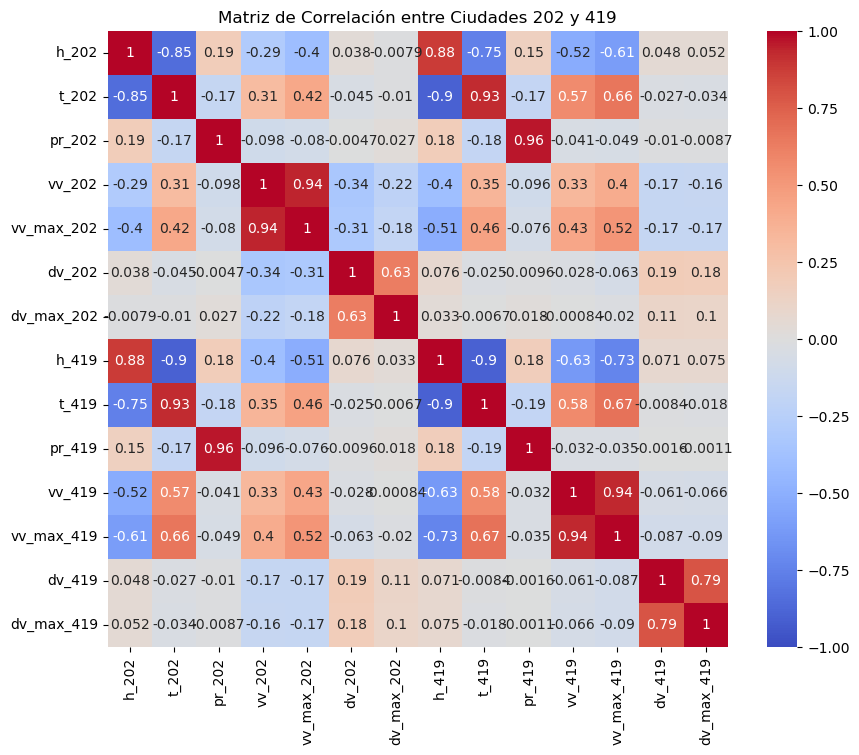

In [13]:
ciudad_202 = df[df['codigo'] == 355].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 207].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']],
    lsuffix='_202', rsuffix='_419', how='inner'
)
merged_data = merged_data.dropna()
merged_data
correlation_matrix = merged_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Ciudades 202 y 419")
plt.show()

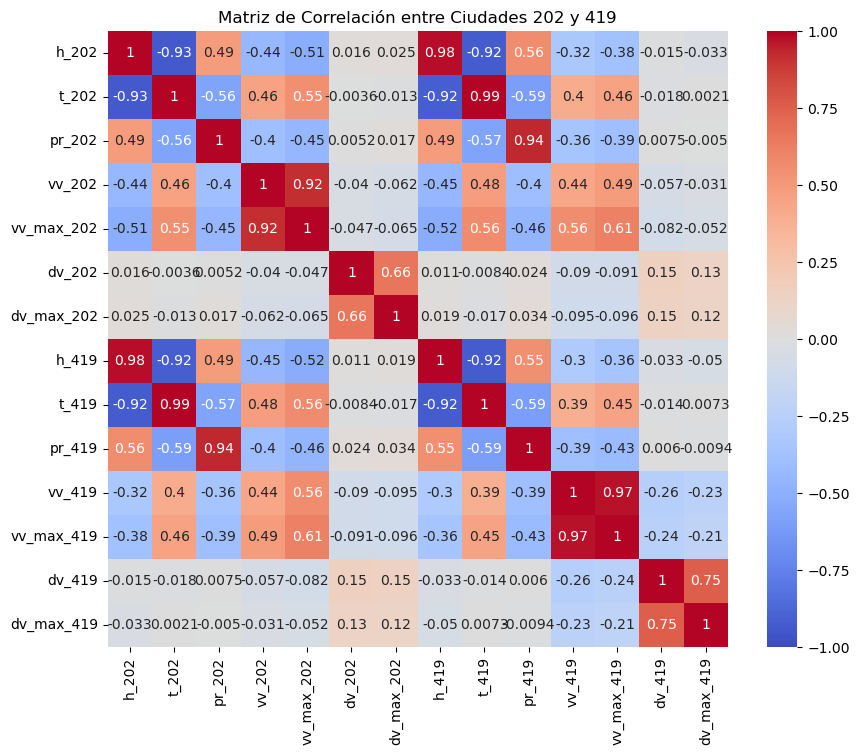

In [14]:
ciudad_202 = df[df['codigo'] == 202].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 419].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']],
    lsuffix='_202', rsuffix='_419', how='inner'
)
merged_data = merged_data.dropna()
merged_data
correlation_matrix = merged_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Ciudades 202 y 419")
plt.show()

In [180]:
# mira cantida de minutos vacios 
df.shape

(13472431, 16)

In [4]:
fecha_minima_por_codigo = df.groupby('codigo')['fecha_hora'].min().reset_index()
fecha_minima_por_codigo = fecha_minima_por_codigo.rename(columns={'fecha_hora': 'fecha_minima'})
fecha_minima_por_codigo

,codigo,fecha_minima
0,197,2018-02-07 13:44:00
1,202,2012-10-30 13:00:37
2,207,2013-02-25 15:19:59
3,249,2018-02-06 10:33:00
4,355,2019-02-13 14:51:00
5,419,2019-12-26 15:59:00


In [5]:
fecha_maxima_por_codigo = df.groupby('codigo')['fecha_hora'].max().reset_index()
fecha_maxima_por_codigo = fecha_maxima_por_codigo.rename(columns={'fecha_hora': 'fecha_minima'})
fecha_maxima_por_codigo

,codigo,fecha_minima
0,197,2024-11-06 16:54:00
1,202,2024-07-31 23:59:00
2,207,2024-07-31 23:59:00
3,249,2024-07-31 23:59:00
4,355,2024-07-19 10:35:00
5,419,2024-07-31 23:59:00


In [6]:
fecha_minima_global = fecha_minima_por_codigo['fecha_minima'].max()
fecha_maxima_global = fecha_maxima_por_codigo['fecha_minima'].min()
print("Fecha Minimas entre las fechas maximas:", fecha_maxima_global)
print("Fecha máxima entre las fechas mínimas:", fecha_minima_global)

Fecha Minimas entre las fechas maximas: 2024-07-19 10:35:00
Fecha máxima entre las fechas mínimas: 2019-12-26 15:59:00


In [7]:
df = df[df['fecha_hora'] > fecha_minima_global]
df = df[df['fecha_hora'] < fecha_maxima_global]

In [91]:
df = df.sort_values(by=['codigo', 'fecha_hora']).reset_index(drop=True)
df['diferencia_tiempo'] = df.groupby('codigo')['fecha_hora'].diff().dt.total_seconds() / 60 
saltos_minuto = df[(df['diferencia_tiempo'] != 1) & (df['diferencia_tiempo'].notnull())]
print("Registros que no están en intervalos de un minuto:")
print((saltos_minuto[saltos_minuto['diferencia_tiempo']!=1]['diferencia_tiempo'].sum()/len(df))*100,"% no tienen informacion")
saltos_minuto[['codigo', 'fecha_hora', 'diferencia_tiempo']]


Registros que no están en intervalos de un minuto:
7.465202147641242 % no tienen informacion


,codigo,fecha_hora,diferencia_tiempo
116,197,2019-12-26 17:57:00,2.0
286,197,2019-12-26 20:48:00,2.0
383,197,2019-12-26 22:26:00,2.0
505,197,2019-12-27 07:26:00,419.0
599,197,2019-12-27 09:01:00,2.0
...,...,...,...
13470894,419,2024-07-18 08:30:00,2.0
13470959,419,2024-07-18 09:36:00,2.0
13470991,419,2024-07-18 10:09:00,2.0
13471023,419,2024-07-18 10:42:00,2.0


In [92]:
saltos_mayores_por_codigo = saltos_minuto.sort_values(by=['codigo', 'diferencia_tiempo'], ascending=[True, False]) \
                                         .drop_duplicates(subset=['codigo'], keep='first') \
                                         [['codigo', 'fecha_hora', 'diferencia_tiempo']]
saltos_mayores_por_codigo

,codigo,fecha_hora,diferencia_tiempo
2225455,197,2024-06-26 11:03:00,37227.0
2914787,202,2021-04-13 14:18:00,4087.0
6444418,207,2023-12-12 14:14:00,121167.0
7172766,249,2020-12-15 13:14:00,27515.0
10619704,355,2023-06-08 16:13:00,21910.0
12979488,419,2023-07-28 15:30:00,31966.0


# Modelos 202 y 419

Conjunto Entrenamiento
Error Absoluto Medio (MAE): 0.014987410229511852
Error Cuadrático Medio (MSE): 0.00040183978386739116
Raíz del Error Cuadrático Medio (RMSE): 0.02004594183039029
Precisión del modelo (R²): 0.9803295491859751

Conjunto Validación
Error Absoluto Medio (MAE): 0.014967961665289822
Error Cuadrático Medio (MSE): 0.0004002312296348058
Raíz del Error Cuadrático Medio (RMSE): 0.0200057799056874
Precisión del modelo (R²): 0.9804519353687532

Conjunto Prueba
Error Absoluto Medio (MAE): 0.014989287805214068
Error Cuadrático Medio (MSE): 0.00040249293190659395
Raíz del Error Cuadrático Medio (RMSE): 0.02006222649425018
Precisión del modelo (R²): 0.9803366678814742



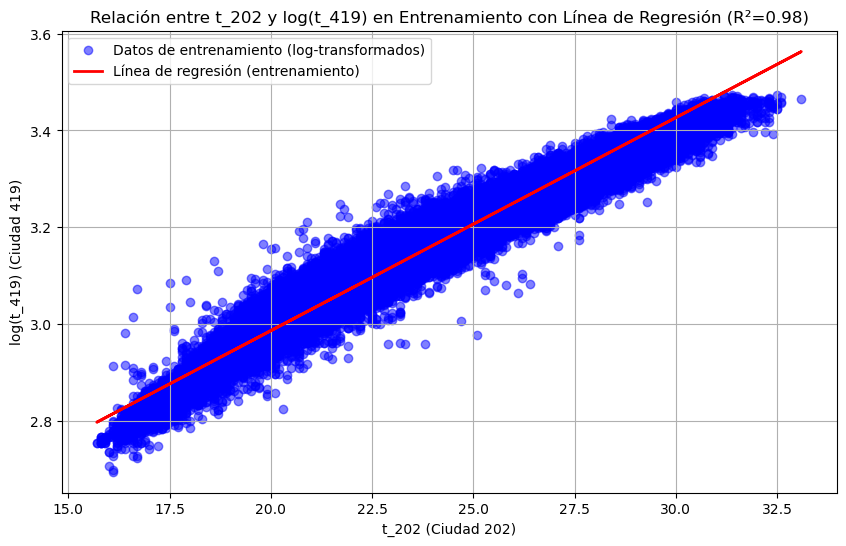

In [8]:
# Modelo de 202 y 419
ciudad_202 = df[df['codigo'] == 202].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 419].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']],
    lsuffix='_202', rsuffix='_419', how='inner'
)
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = merged_data[['t_202']]
y = merged_data['t_419']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

X_train_log = X_train
y_train_log = np.log(y_train)

X_val_log = X_val
y_val_log = np.log(y_val)

X_test_log = X_test
y_test_log = np.log(y_test)

model_lr_202_419 = LinearRegression()
model_lr_202_419.fit(X_train_log, y_train_log)

y_pred_train = model_lr_202_419.predict(X_train_log)
y_pred_val = model_lr_202_419.predict(X_val_log)
y_pred_test = model_lr_202_419.predict(X_test_log)

def evaluar_modelo(y_real, y_pred, conjunto):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_pred)
    
    print(f"Conjunto {conjunto}")
    print(f"Error Absoluto Medio (MAE): {mae}")
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
    print(f"Precisión del modelo (R²): {r2}\n")

evaluar_modelo(y_train_log, y_pred_train, "Entrenamiento")
evaluar_modelo(y_val_log, y_pred_val, "Validación")
evaluar_modelo(y_test_log, y_pred_test, "Prueba")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_log, y_test_log, color='blue', alpha=0.5, label='Datos de entrenamiento (log-transformados)')
plt.plot(X_test_log, y_pred_test, color='red', linewidth=2, label='Línea de regresión (entrenamiento)')
plt.xlabel("t_202 (Ciudad 202)")
plt.ylabel("log(t_419) (Ciudad 419)")
plt.title(f"Relación entre t_202 y log(t_419) en Entrenamiento con Línea de Regresión (R²={r2_score(y_test_log, y_pred_test):.2f})")
plt.legend()
plt.grid(True)
plt.show()

Conjunto Entrenamiento
Error Absoluto Medio (MAE): 0.14855767836721595
Error Cuadrático Medio (MSE): 0.044028814470522724
Raíz del Error Cuadrático Medio (RMSE): 0.20983044219207736
Precisión del modelo (R²): 0.9536538052577063

Conjunto Validación
Error Absoluto Medio (MAE): 0.14865875043666546
Error Cuadrático Medio (MSE): 0.04408534811071531
Raíz del Error Cuadrático Medio (RMSE): 0.20996511165123435
Precisión del modelo (R²): 0.9535667494116672

Conjunto Prueba
Error Absoluto Medio (MAE): 0.14838585375873464
Error Cuadrático Medio (MSE): 0.043942332530805955
Raíz del Error Cuadrático Medio (RMSE): 0.20962426512883942
Precisión del modelo (R²): 0.9537499391180708



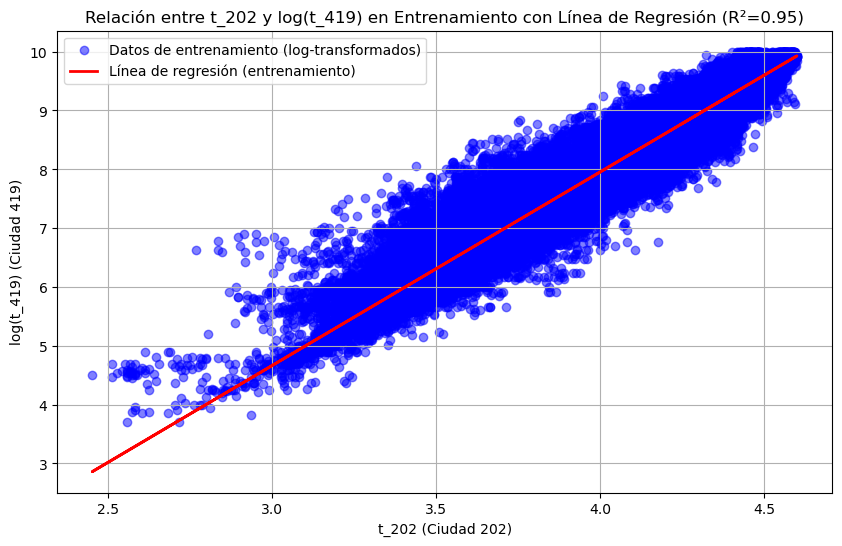

In [9]:
# Modelo de 202 y 419
ciudad_202 = df[df['codigo'] == 202].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 419].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']],
    lsuffix='_202', rsuffix='_419', how='inner'
)
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = merged_data[['h_202']]
y = merged_data['h_419']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

X_train_log = np.log(X_train)
y_train_log = np.sqrt(y_train)

X_val_log = np.log(X_val)
y_val_log = np.sqrt(y_val)

X_test_log = np.log(X_test)
y_test_log = np.sqrt(y_test)

model_hr_202_419 = LinearRegression()
model_hr_202_419.fit(X_train_log, y_train_log)

y_pred_train = model_hr_202_419.predict(X_train_log)
y_pred_val = model_hr_202_419.predict(X_val_log)
y_pred_test = model_hr_202_419.predict(X_test_log)

def evaluar_modelo(y_real, y_pred, conjunto):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_pred)
    
    print(f"Conjunto {conjunto}")
    print(f"Error Absoluto Medio (MAE): {mae}")
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
    print(f"Precisión del modelo (R²): {r2}\n")

evaluar_modelo(y_train_log, y_pred_train, "Entrenamiento")
evaluar_modelo(y_val_log, y_pred_val, "Validación")
evaluar_modelo(y_test_log, y_pred_test, "Prueba")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_log, y_test_log, color='blue', alpha=0.5, label='Datos de entrenamiento (log-transformados)')
plt.plot(X_test_log, y_pred_test, color='red', linewidth=2, label='Línea de regresión (entrenamiento)')
plt.xlabel("t_202 (Ciudad 202)")
plt.ylabel("log(t_419) (Ciudad 419)")
plt.title(f"Relación entre t_202 y log(t_419) en Entrenamiento con Línea de Regresión (R²={r2_score(y_test_log, y_pred_test):.2f})")
plt.legend()
plt.grid(True)
plt.show()

Conjunto Entrenamiento
Error Absoluto Medio (MAE): 0.578286172672247
Error Cuadrático Medio (MSE): 0.584483921598447
Raíz del Error Cuadrático Medio (RMSE): 0.7645154815950079
Precisión del modelo (R²): 0.8763412742161218

Conjunto Validación
Error Absoluto Medio (MAE): 0.5771819313853926
Error Cuadrático Medio (MSE): 0.5837782678801147
Raíz del Error Cuadrático Medio (RMSE): 0.7640538383387094
Precisión del modelo (R²): 0.8765659064641635

Conjunto Prueba
Error Absoluto Medio (MAE): 0.5776723134442979
Error Cuadrático Medio (MSE): 0.58367541550289
Raíz del Error Cuadrático Medio (RMSE): 0.7639865283517047
Precisión del modelo (R²): 0.8767749584685787



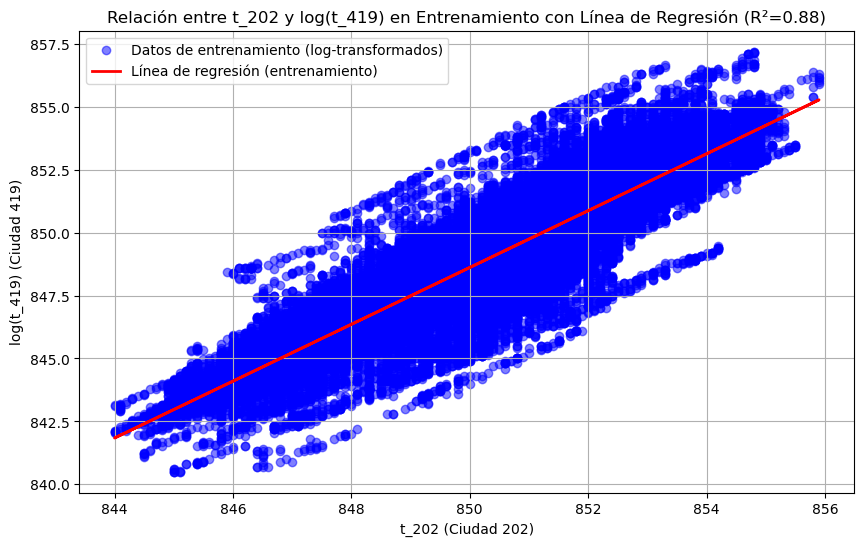

In [10]:
# Modelo de 202 y 419
ciudad_202 = df[df['codigo'] == 202].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 419].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']],
    lsuffix='_202', rsuffix='_419', how='inner'
)
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = merged_data[['pr_202']]
y = merged_data['pr_419']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

X_train_log = X_train
y_train_log = y_train

X_val_log = X_val
y_val_log = y_val

X_test_log = X_test
y_test_log =y_test

model_pr_202_419 = LinearRegression()
model_pr_202_419.fit(X_train_log, y_train_log)

y_pred_train = model_pr_202_419.predict(X_train_log)
y_pred_val = model_pr_202_419.predict(X_val_log)
y_pred_test = model_pr_202_419.predict(X_test_log)

def evaluar_modelo(y_real, y_pred, conjunto):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_pred)
    
    print(f"Conjunto {conjunto}")
    print(f"Error Absoluto Medio (MAE): {mae}")
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
    print(f"Precisión del modelo (R²): {r2}\n")

evaluar_modelo(y_train_log, y_pred_train, "Entrenamiento")
evaluar_modelo(y_val_log, y_pred_val, "Validación")
evaluar_modelo(y_test_log, y_pred_test, "Prueba")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_log, y_test_log, color='blue', alpha=0.5, label='Datos de entrenamiento (log-transformados)')
plt.plot(X_test_log, y_pred_test, color='red', linewidth=2, label='Línea de regresión (entrenamiento)')
plt.xlabel("t_202 (Ciudad 202)")
plt.ylabel("log(t_419) (Ciudad 419)")
plt.title(f"Relación entre t_202 y log(t_419) en Entrenamiento con Línea de Regresión (R²={r2_score(y_test_log, y_pred_test):.2f})")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Filtrar datos de las dos ciudades
ciudad_202 = df[df['codigo'] == 202].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 419].set_index('fecha_hora').sort_index()

# Combinar datos de las dos ciudades
merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']],
    lsuffix='_202', rsuffix='_419', how='inner'
)

# Calcular el promedio de velocidad del viento por hora para ambas ciudades
promedio_por_hora = merged_data.groupby('hora_202').agg({
    'vv_202': 'mean',
    'vv_419': 'mean'
})

# Separar características y variable objetivo
X = promedio_por_hora[['vv_202']]
y = promedio_por_hora['vv_419']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model_vv_202_419 = RandomForestRegressor(random_state=42)
model_vv_202_419.fit(X_train, y_train)

# Validación cruzada en los datos de entrenamiento
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_vv_202_419, X_train, y_train, cv=5, scoring='r2')
print("\nResultados de Validación Cruzada:")
print("R² promedio en validación cruzada:", cv_scores.mean())
print("Desviación estándar de R² en validación cruzada:", cv_scores.std())

# Evaluación en el conjunto de prueba
y_pred_test = model_vv_202_419.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nEvaluación del modelo Random Forest en el conjunto de prueba:")
print("Error Absoluto Medio (MAE):", mae_test)
print("Error Cuadrático Medio (MSE):", mse_test)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_test)
print("Coeficiente de Determinación (R²) en el conjunto de prueba:", r2_test)

# Evaluación en el conjunto de entrenamiento
y_pred_train = model_vv_202_419.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("\nPrecisión del modelo Random Forest (R²) en el conjunto de entrenamiento:", r2_train)


Resultados de Validación Cruzada:
R² promedio en validación cruzada: 0.7008786056900997
Desviación estándar de R² en validación cruzada: 0.2197643663545594

Evaluación del modelo Random Forest en el conjunto de prueba:
Error Absoluto Medio (MAE): 0.49568030229370025
Error Cuadrático Medio (MSE): 0.3424648351205459
Raíz del Error Cuadrático Medio (RMSE): 0.5852049513807499
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.5718297839145493

Precisión del modelo Random Forest (R²) en el conjunto de entrenamiento: 0.9637552478892891


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Filtrar datos de las dos ciudades
ciudad_202 = df[df['codigo'] == 202].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 419].set_index('fecha_hora').sort_index()

# Combinar datos de las dos ciudades
merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']],
    lsuffix='_202', rsuffix='_419', how='inner'
)

# Calcular el promedio de velocidad del viento por hora para ambas ciudades
promedio_por_hora = merged_data.groupby('hora_419').agg({
    'vv_202': 'mean',
    'vv_419': 'mean'
})

# Separar características y variable objetivo
X = promedio_por_hora[['vv_419']]
y = promedio_por_hora['vv_202']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model_vv_202_419_v2 = RandomForestRegressor(random_state=42)
model_vv_202_419_v2.fit(X_train, y_train)

# Validación cruzada en los datos de entrenamiento
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_vv_202_419_v2, X_train, y_train, cv=5, scoring='r2')
print("\nResultados de Validación Cruzada:")
print("R² promedio en validación cruzada:", cv_scores.mean())
print("Desviación estándar de R² en validación cruzada:", cv_scores.std())

# Evaluación en el conjunto de prueba
y_pred_test = model_vv_202_419_v2.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nEvaluación del modelo Random Forest en el conjunto de prueba:")
print("Error Absoluto Medio (MAE):", mae_test)
print("Error Cuadrático Medio (MSE):", mse_test)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_test)
print("Coeficiente de Determinación (R²) en el conjunto de prueba:", r2_test)

# Evaluación en el conjunto de entrenamiento
y_pred_train = model_vv_202_419_v2.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("\nPrecisión del modelo Random Forest (R²) en el conjunto de entrenamiento:", r2_train)


Resultados de Validación Cruzada:
R² promedio en validación cruzada: 0.22131555013591192
Desviación estándar de R² en validación cruzada: 0.9802672680218663

Evaluación del modelo Random Forest en el conjunto de prueba:
Error Absoluto Medio (MAE): 0.15653384240964624
Error Cuadrático Medio (MSE): 0.052465581030590645
Raíz del Error Cuadrático Medio (RMSE): 0.22905366408462155
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.8315027164466807

Precisión del modelo Random Forest (R²) en el conjunto de entrenamiento: 0.9379686920043001


# 197 y 249 ======================================

Conjunto Entrenamiento
Error Absoluto Medio (MAE): 0.02377226947977309
Error Cuadrático Medio (MSE): 0.001056479050878037
Raíz del Error Cuadrático Medio (RMSE): 0.03250352366864302
Precisión del modelo (R²): 0.9607245815539678

Conjunto Validación
Error Absoluto Medio (MAE): 0.02372110458848224
Error Cuadrático Medio (MSE): 0.0010503250462073476
Raíz del Error Cuadrático Medio (RMSE): 0.03240871867580308
Precisión del modelo (R²): 0.9609901406296584

Conjunto Prueba
Error Absoluto Medio (MAE): 0.023733472561887254
Error Cuadrático Medio (MSE): 0.0010553584609208021
Raíz del Error Cuadrático Medio (RMSE): 0.03248628111866303
Precisión del modelo (R²): 0.960774633596485



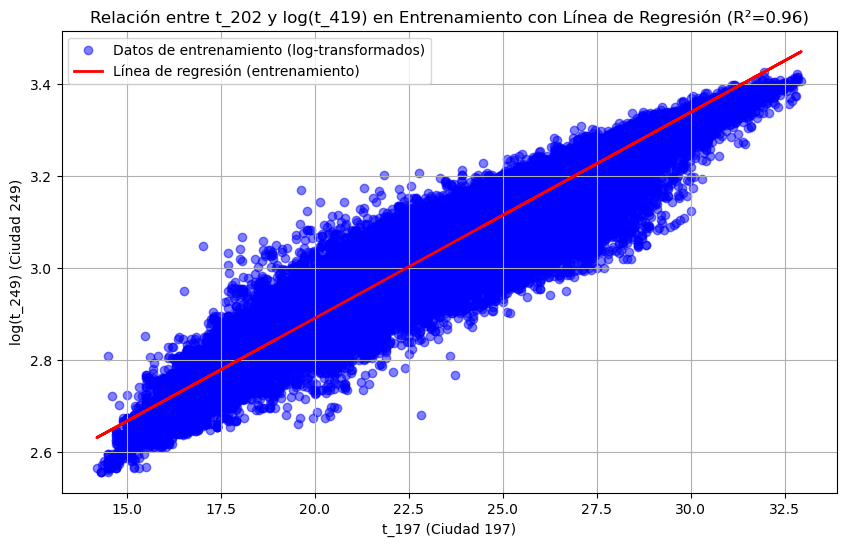

In [13]:
# Modelo de 202 y 419
ciudad_202 = df[df['codigo'] == 197].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 249].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']],
    lsuffix='_197', rsuffix='_249', how='inner'
)
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = merged_data[['t_197']]
y = merged_data['t_249']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

X_train_log = X_train
y_train_log = np.log(y_train)

X_val_log = X_val
y_val_log = np.log(y_val)

X_test_log = X_test
y_test_log = np.log(y_test)

model_lr_197_249 = LinearRegression()
model_lr_197_249.fit(X_train_log, y_train_log)

y_pred_train = model_lr_197_249.predict(X_train_log)
y_pred_val = model_lr_197_249.predict(X_val_log)
y_pred_test = model_lr_197_249.predict(X_test_log)

def evaluar_modelo(y_real, y_pred, conjunto):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_pred)
    
    print(f"Conjunto {conjunto}")
    print(f"Error Absoluto Medio (MAE): {mae}")
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
    print(f"Precisión del modelo (R²): {r2}\n")

evaluar_modelo(y_train_log, y_pred_train, "Entrenamiento")
evaluar_modelo(y_val_log, y_pred_val, "Validación")
evaluar_modelo(y_test_log, y_pred_test, "Prueba")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_log, y_test_log, color='blue', alpha=0.5, label='Datos de entrenamiento (log-transformados)')
plt.plot(X_test_log, y_pred_test, color='red', linewidth=2, label='Línea de regresión (entrenamiento)')
plt.xlabel("t_197 (Ciudad 197)")
plt.ylabel("log(t_249) (Ciudad 249)")
plt.title(f"Relación entre t_202 y log(t_419) en Entrenamiento con Línea de Regresión (R²={r2_score(y_test_log, y_pred_test):.2f})")
plt.legend()
plt.grid(True)
plt.show()

Conjunto Entrenamiento
Error Absoluto Medio (MAE): 0.039286769128093375
Error Cuadrático Medio (MSE): 0.0029238500049035654
Raíz del Error Cuadrático Medio (RMSE): 0.05407263637833433
Precisión del modelo (R²): 0.9382075668841867

Conjunto Validación
Error Absoluto Medio (MAE): 0.03932483790122332
Error Cuadrático Medio (MSE): 0.002935708897657609
Raíz del Error Cuadrático Medio (RMSE): 0.05418218247410867
Precisión del modelo (R²): 0.9378685626205965

Conjunto Prueba
Error Absoluto Medio (MAE): 0.039273830295011414
Error Cuadrático Medio (MSE): 0.002921707808824362
Raíz del Error Cuadrático Medio (RMSE): 0.05405282424466239
Precisión del modelo (R²): 0.9381468274666305



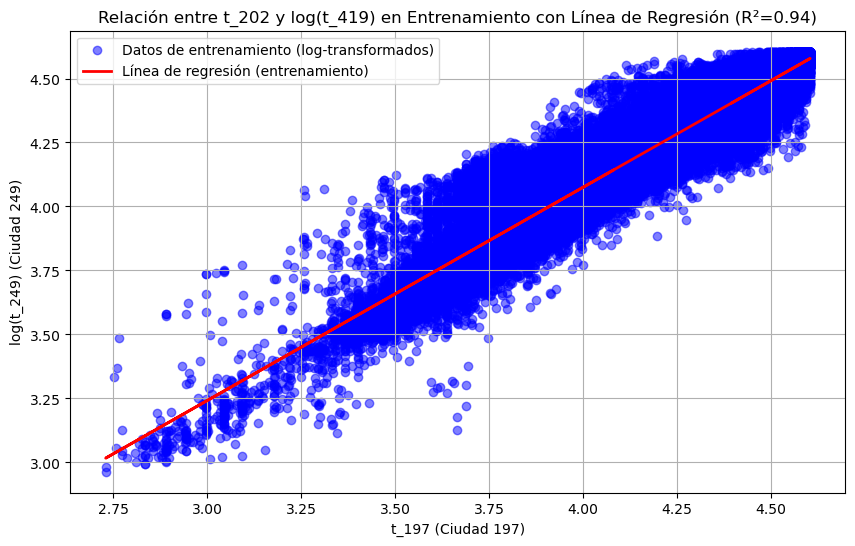

In [14]:
# Modelo de 202 y 419
ciudad_202 = df[df['codigo'] == 197].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 249].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']],
    lsuffix='_197', rsuffix='_249', how='inner'
)
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = merged_data[['h_197']]
y = merged_data['h_249']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

X_train_log = np.log(X_train)
y_train_log = np.log(y_train)

X_val_log = np.log(X_val)
y_val_log = np.log(y_val)

X_test_log = np.log(X_test)
y_test_log = np.log(y_test)

model_hr_197_249 = LinearRegression()
model_hr_197_249.fit(X_train_log, y_train_log)

y_pred_train = model_hr_197_249.predict(X_train_log)
y_pred_val = model_hr_197_249.predict(X_val_log)
y_pred_test = model_hr_197_249.predict(X_test_log)

def evaluar_modelo(y_real, y_pred, conjunto):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_pred)
    
    print(f"Conjunto {conjunto}")
    print(f"Error Absoluto Medio (MAE): {mae}")
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
    print(f"Precisión del modelo (R²): {r2}\n")

evaluar_modelo(y_train_log, y_pred_train, "Entrenamiento")
evaluar_modelo(y_val_log, y_pred_val, "Validación")
evaluar_modelo(y_test_log, y_pred_test, "Prueba")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_log, y_test_log, color='blue', alpha=0.5, label='Datos de entrenamiento (log-transformados)')
plt.plot(X_test_log, y_pred_test, color='red', linewidth=2, label='Línea de regresión (entrenamiento)')
plt.xlabel("t_197 (Ciudad 197)")
plt.ylabel("log(t_249) (Ciudad 249)")
plt.title(f"Relación entre t_202 y log(t_419) en Entrenamiento con Línea de Regresión (R²={r2_score(y_test_log, y_pred_test):.2f})")
plt.legend()
plt.grid(True)
plt.show()

Conjunto Entrenamiento
Error Absoluto Medio (MAE): 0.42037932865584066
Error Cuadrático Medio (MSE): 0.3188288595689848
Raíz del Error Cuadrático Medio (RMSE): 0.5646493244209053
Precisión del modelo (R²): 0.8762085470357084

Conjunto Validación
Error Absoluto Medio (MAE): 0.41978692320626093
Error Cuadrático Medio (MSE): 0.31777497489737794
Raíz del Error Cuadrático Medio (RMSE): 0.5637153314372227
Precisión del modelo (R²): 0.8764041090364275

Conjunto Prueba
Error Absoluto Medio (MAE): 0.42193948786416496
Error Cuadrático Medio (MSE): 0.3208087957885751
Raíz del Error Cuadrático Medio (RMSE): 0.5663998550393309
Precisión del modelo (R²): 0.8754417683448389



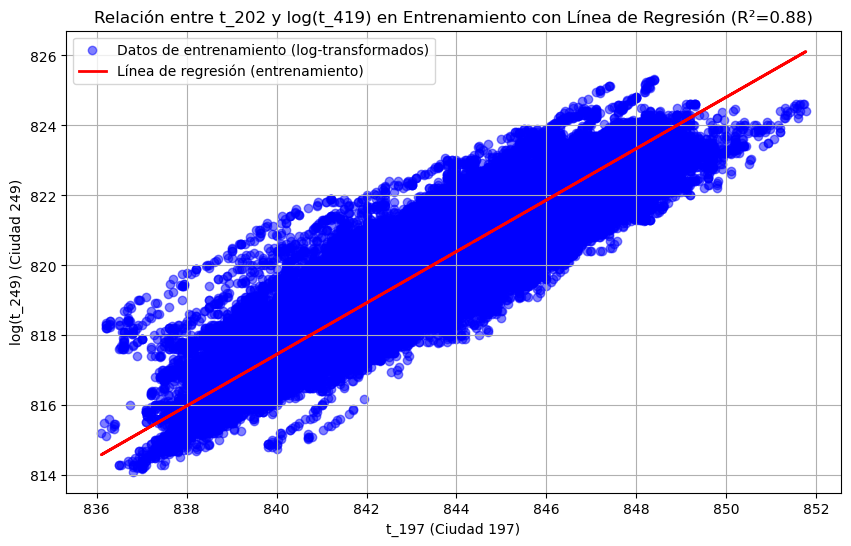

In [15]:
# Modelo de 202 y 419
ciudad_202 = df[df['codigo'] == 197].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 249].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']],
    lsuffix='_197', rsuffix='_249', how='inner'
)
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = merged_data[['pr_197']]
y = merged_data['pr_249']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

X_train_log = X_train
y_train_log = y_train

X_val_log = X_val
y_val_log = y_val

X_test_log = X_test
y_test_log = y_test

model_pr_197_249 = LinearRegression()
model_pr_197_249.fit(X_train_log, y_train_log)

y_pred_train = model_pr_197_249.predict(X_train_log)
y_pred_val = model_pr_197_249.predict(X_val_log)
y_pred_test = model_pr_197_249.predict(X_test_log)

def evaluar_modelo(y_real, y_pred, conjunto):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_pred)
    
    print(f"Conjunto {conjunto}")
    print(f"Error Absoluto Medio (MAE): {mae}")
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
    print(f"Precisión del modelo (R²): {r2}\n")

evaluar_modelo(y_train_log, y_pred_train, "Entrenamiento")
evaluar_modelo(y_val_log, y_pred_val, "Validación")
evaluar_modelo(y_test_log, y_pred_test, "Prueba")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_log, y_test_log, color='blue', alpha=0.5, label='Datos de entrenamiento (log-transformados)')
plt.plot(X_test_log, y_pred_test, color='red', linewidth=2, label='Línea de regresión (entrenamiento)')
plt.xlabel("t_197 (Ciudad 197)")
plt.ylabel("log(t_249) (Ciudad 249)")
plt.title(f"Relación entre t_202 y log(t_419) en Entrenamiento con Línea de Regresión (R²={r2_score(y_test_log, y_pred_test):.2f})")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Filtrar datos de las dos ciudades
ciudad_202 = df[df['codigo'] == 197].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 249].set_index('fecha_hora').sort_index()

# Combinar datos de las dos ciudades
merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']],
    lsuffix='_197', rsuffix='_249', how='inner'
)

# Calcular el promedio de velocidad del viento por hora para ambas ciudades
promedio_por_hora = merged_data.groupby('hora_249').agg({
    'vv_197': 'mean',
    'vv_249': 'mean'
})

# Separar características y variable objetivo
X = promedio_por_hora[['vv_249']]
y = promedio_por_hora['vv_197']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model_vv_256_197 = RandomForestRegressor(random_state=42)
model_vv_256_197.fit(X_train, y_train)

# Validación cruzada en los datos de entrenamiento
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_vv_256_197, X_train, y_train, cv=5, scoring='r2')
print("\nResultados de Validación Cruzada:")
print("R² promedio en validación cruzada:", cv_scores.mean())
print("Desviación estándar de R² en validación cruzada:", cv_scores.std())

# Evaluación en el conjunto de prueba
y_pred_test = model_vv_256_197.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nEvaluación del modelo Random Forest en el conjunto de prueba:")
print("Error Absoluto Medio (MAE):", mae_test)
print("Error Cuadrático Medio (MSE):", mse_test)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_test)
print("Coeficiente de Determinación (R²) en el conjunto de prueba:", r2_test)

# Evaluación en el conjunto de entrenamiento
y_pred_train = model_vv_256_197.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("\nPrecisión del modelo Random Forest (R²) en el conjunto de entrenamiento:", r2_train)


Resultados de Validación Cruzada:
R² promedio en validación cruzada: 0.9253362890312641
Desviación estándar de R² en validación cruzada: 0.06756077194782036

Evaluación del modelo Random Forest en el conjunto de prueba:
Error Absoluto Medio (MAE): 0.024231196243946162
Error Cuadrático Medio (MSE): 0.0008479844721634809
Raíz del Error Cuadrático Medio (RMSE): 0.029120172941853914
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.9870336151466669

Precisión del modelo Random Forest (R²) en el conjunto de entrenamiento: 0.9928524148804014


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

ciudad_202 = df[df['codigo'] == 249].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 197].set_index('fecha_hora').sort_index()

# Combinar datos de las dos ciudades
merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']],
    lsuffix='_249', rsuffix='_197', how='inner'
)

# Calcular el promedio de velocidad del viento por hora para ambas ciudades
promedio_por_hora = merged_data.groupby('hora_197').agg({
    'vv_197': 'mean',
    'vv_249': 'mean'
})

# Separar características y variable objetivo
X = promedio_por_hora[['vv_197']]
y = promedio_por_hora['vv_249']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model_vv_256_197_v2 = RandomForestRegressor(random_state=42)
model_vv_256_197_v2.fit(X_train, y_train)

# Validación cruzada en los datos de entrenamiento
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_vv_256_197_v2, X_train, y_train, cv=5, scoring='r2')
print("\nResultados de Validación Cruzada:")
print("R² promedio en validación cruzada:", cv_scores.mean())
print("Desviación estándar de R² en validación cruzada:", cv_scores.std())

# Evaluación en el conjunto de prueba
y_pred_test = model_vv_256_197_v2.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nEvaluación del modelo Random Forest en el conjunto de prueba:")
print("Error Absoluto Medio (MAE):", mae_test)
print("Error Cuadrático Medio (MSE):", mse_test)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_test)
print("Coeficiente de Determinación (R²) en el conjunto de prueba:", r2_test)

# Evaluación en el conjunto de entrenamiento
y_pred_train = model_vv_256_197_v2.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("\nPrecisión del modelo Random Forest (R²) en el conjunto de entrenamiento:", r2_train)


Resultados de Validación Cruzada:
R² promedio en validación cruzada: 0.9369925152066113
Desviación estándar de R² en validación cruzada: 0.06989740175107238

Evaluación del modelo Random Forest en el conjunto de prueba:
Error Absoluto Medio (MAE): 0.039406321445306536
Error Cuadrático Medio (MSE): 0.0020098518251579454
Raíz del Error Cuadrático Medio (RMSE): 0.04483137099351241
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.9634075291051545

Precisión del modelo Random Forest (R²) en el conjunto de entrenamiento: 0.9924279910719003


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
ciudad_202 = df[df['codigo'] == 197].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 249].set_index('fecha_hora').sort_index()

# Combinar datos de las dos ciudades
merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']],
    lsuffix='_197', rsuffix='_249', how='inner'
)
# Calcular el promedio de velocidad de viento por hora para ambas ciudades
promedio_por_hora = merged_data.groupby('hora_249').agg({
    'dv_249': 'mean',
    'dv_197': 'mean'
})

X = promedio_por_hora[['dv_249']]
y = promedio_por_hora['dv_197']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model_dv_256_197 = RandomForestRegressor(random_state=42)
model_dv_256_197.fit(X_train, y_train)

# Validación cruzada en los datos de entrenamiento
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_dv_256_197, X_train, y_train, cv=5, scoring='r2')
print("\nResultados de Validación Cruzada:")
print("R² promedio en validación cruzada:", cv_scores.mean())
print("Desviación estándar de R² en validación cruzada:", cv_scores.std())

# Evaluación en el conjunto de prueba
y_pred_test = model_dv_256_197.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nEvaluación del modelo Random Forest en el conjunto de prueba:")
print("Error Absoluto Medio (MAE):", mae_test)
print("Error Cuadrático Medio (MSE):", mse_test)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_test)
print("Coeficiente de Determinación (R²) en el conjunto de prueba:", r2_test)

# Evaluación en el conjunto de entrenamiento
y_pred_train = model_dv_256_197.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("\nPrecisión del modelo Random Forest (R²) en el conjunto de entrenamiento:", r2_train)



Resultados de Validación Cruzada:
R² promedio en validación cruzada: 0.7016504441073493
Desviación estándar de R² en validación cruzada: 0.2896716017262212

Evaluación del modelo Random Forest en el conjunto de prueba:
Error Absoluto Medio (MAE): 5.49876616612259
Error Cuadrático Medio (MSE): 49.14184382730916
Raíz del Error Cuadrático Medio (RMSE): 7.010124380302332
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.9579034261341707

Precisión del modelo Random Forest (R²) en el conjunto de entrenamiento: 0.9721208303616317


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

ciudad_202 = df[df['codigo'] == 249].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 197].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']],
    lsuffix='_249', rsuffix='_197', how='inner'
)
promedio_por_hora = merged_data.groupby('hora_197').agg({
    'dv_249': 'mean',
    'dv_197': 'mean'
})

X = promedio_por_hora[['dv_197']]
y = promedio_por_hora['dv_249']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model_dv_256_197_v2 = RandomForestRegressor(random_state=42)
model_dv_256_197_v2.fit(X_train, y_train)

# Validación cruzada en los datos de entrenamiento
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_dv_256_197_v2, X_train, y_train, cv=5, scoring='r2')
print("\nResultados de Validación Cruzada:")
print("R² promedio en validación cruzada:", cv_scores.mean())
print("Desviación estándar de R² en validación cruzada:", cv_scores.std())

# Evaluación en el conjunto de prueba
y_pred_test = model_dv_256_197_v2.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nEvaluación del modelo Random Forest en el conjunto de prueba:")
print("Error Absoluto Medio (MAE):", mae_test)
print("Error Cuadrático Medio (MSE):", mse_test)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_test)
print("Coeficiente de Determinación (R²) en el conjunto de prueba:", r2_test)

# Evaluación en el conjunto de entrenamiento
y_pred_train = model_dv_256_197_v2.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("\nPrecisión del modelo Random Forest (R²) en el conjunto de entrenamiento:", r2_train)


Resultados de Validación Cruzada:
R² promedio en validación cruzada: 0.7453855055561187
Desviación estándar de R² en validación cruzada: 0.34020214736297544

Evaluación del modelo Random Forest en el conjunto de prueba:
Error Absoluto Medio (MAE): 12.79012336110328
Error Cuadrático Medio (MSE): 397.08650115885524
Raíz del Error Cuadrático Medio (RMSE): 19.927029411301003
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.7553501333608661

Precisión del modelo Random Forest (R²) en el conjunto de entrenamiento: 0.9839064384156533


# 355 y 207 =======================

Conjunto Entrenamiento
Error Absoluto Medio (MAE): 0.1268089847676511
Error Cuadrático Medio (MSE): 0.030188668309072447
Raíz del Error Cuadrático Medio (RMSE): 0.17374886563391556
Precisión del modelo (R²): 0.830615794374283

Conjunto Validación
Error Absoluto Medio (MAE): 0.12678111869542202
Error Cuadrático Medio (MSE): 0.030288537519903763
Raíz del Error Cuadrático Medio (RMSE): 0.17403602362701742
Precisión del modelo (R²): 0.8302649058376693

Conjunto Prueba
Error Absoluto Medio (MAE): 0.1266469194260445
Error Cuadrático Medio (MSE): 0.03017929941664166
Raíz del Error Cuadrático Medio (RMSE): 0.17372190252424033
Precisión del modelo (R²): 0.8311876103629325



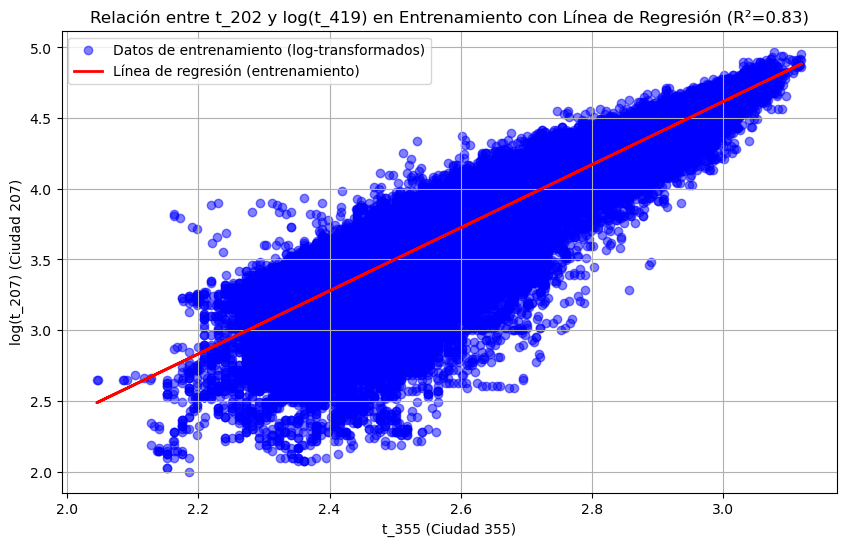

In [20]:
# Modelo de 202 y 419
ciudad_202 = df[df['codigo'] == 355].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 207].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']],
    lsuffix='_355', rsuffix='_207', how='inner'
)
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = merged_data[['t_355']]
y = merged_data['t_207']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

X_train_log = np.log(X_train)
y_train_log = np.sqrt(y_train)

X_val_log = np.log(X_val)
y_val_log = np.sqrt(y_val)

X_test_log = np.log(X_test)
y_test_log = np.sqrt(y_test)

model_lr_355_207 = LinearRegression()
model_lr_355_207.fit(X_train_log, y_train_log)

y_pred_train = model_lr_355_207.predict(X_train_log)
y_pred_val = model_lr_355_207.predict(X_val_log)
y_pred_test = model_lr_355_207.predict(X_test_log)

def evaluar_modelo(y_real, y_pred, conjunto):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_pred)
    
    print(f"Conjunto {conjunto}")
    print(f"Error Absoluto Medio (MAE): {mae}")
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
    print(f"Precisión del modelo (R²): {r2}\n")

evaluar_modelo(y_train_log, y_pred_train, "Entrenamiento")
evaluar_modelo(y_val_log, y_pred_val, "Validación")
evaluar_modelo(y_test_log, y_pred_test, "Prueba")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_log, y_test_log, color='blue', alpha=0.5, label='Datos de entrenamiento (log-transformados)')
plt.plot(X_test_log, y_pred_test, color='red', linewidth=2, label='Línea de regresión (entrenamiento)')
plt.xlabel("t_355 (Ciudad 355)")
plt.ylabel("log(t_207) (Ciudad 207)")
plt.title(f"Relación entre t_202 y log(t_419) en Entrenamiento con Línea de Regresión (R²={r2_score(y_test_log, y_pred_test):.2f})")
plt.legend()
plt.grid(True)
plt.show()

Conjunto Entrenamiento
Error Absoluto Medio (MAE): 0.06589260154301758
Error Cuadrático Medio (MSE): 0.00778671406155584
Raíz del Error Cuadrático Medio (RMSE): 0.0882423597914054
Precisión del modelo (R²): 0.8255313165189888

Conjunto Validación
Error Absoluto Medio (MAE): 0.06591931992827814
Error Cuadrático Medio (MSE): 0.007799254036910523
Raíz del Error Cuadrático Medio (RMSE): 0.08831338537792854
Precisión del modelo (R²): 0.8258761845564656

Conjunto Prueba
Error Absoluto Medio (MAE): 0.06588469764151289
Error Cuadrático Medio (MSE): 0.007771145072778165
Raíz del Error Cuadrático Medio (RMSE): 0.08815409844572267
Precisión del modelo (R²): 0.8267761209191657



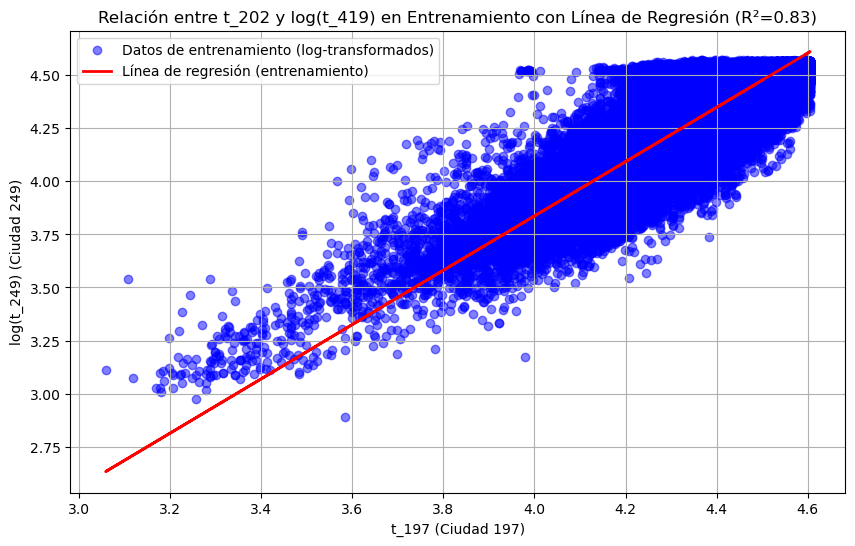

In [21]:
# Modelo de 202 y 419
ciudad_202 = df[df['codigo'] == 355].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 207].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']],
    lsuffix='_355', rsuffix='_207', how='inner'
)
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = merged_data[['h_355']]
y = merged_data['h_207']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

X_train_log = np.log(X_train)
y_train_log = np.log(y_train)

X_val_log = np.log(X_val)
y_val_log = np.log(y_val)

X_test_log = np.log(X_test)
y_test_log = np.log(y_test)

model_hr_355_207 = LinearRegression()
model_hr_355_207.fit(X_train_log, y_train_log)

y_pred_train = model_hr_355_207.predict(X_train_log)
y_pred_val = model_hr_355_207.predict(X_val_log)
y_pred_test = model_hr_355_207.predict(X_test_log)

def evaluar_modelo(y_real, y_pred, conjunto):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_pred)
    
    print(f"Conjunto {conjunto}")
    print(f"Error Absoluto Medio (MAE): {mae}")
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
    print(f"Precisión del modelo (R²): {r2}\n")

evaluar_modelo(y_train_log, y_pred_train, "Entrenamiento")
evaluar_modelo(y_val_log, y_pred_val, "Validación")
evaluar_modelo(y_test_log, y_pred_test, "Prueba")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_log, y_test_log, color='blue', alpha=0.5, label='Datos de entrenamiento (log-transformados)')
plt.plot(X_test_log, y_pred_test, color='red', linewidth=2, label='Línea de regresión (entrenamiento)')
plt.xlabel("t_197 (Ciudad 197)")
plt.ylabel("log(t_249) (Ciudad 249)")
plt.title(f"Relación entre t_202 y log(t_419) en Entrenamiento con Línea de Regresión (R²={r2_score(y_test_log, y_pred_test):.2f})")
plt.legend()
plt.grid(True)
plt.show()

Conjunto Entrenamiento
Error Absoluto Medio (MAE): 0.2287415224857114
Error Cuadrático Medio (MSE): 0.08758016089760381
Raíz del Error Cuadrático Medio (RMSE): 0.2959394547835821
Precisión del modelo (R²): 0.948954146372979

Conjunto Validación
Error Absoluto Medio (MAE): 0.22859931855374155
Error Cuadrático Medio (MSE): 0.08739176657012367
Raíz del Error Cuadrático Medio (RMSE): 0.2956209846579293
Precisión del modelo (R²): 0.9493431418114601

Conjunto Prueba
Error Absoluto Medio (MAE): 0.22814417629637318
Error Cuadrático Medio (MSE): 0.08700716692439786
Raíz del Error Cuadrático Medio (RMSE): 0.29496977289952586
Precisión del modelo (R²): 0.9493183674203565



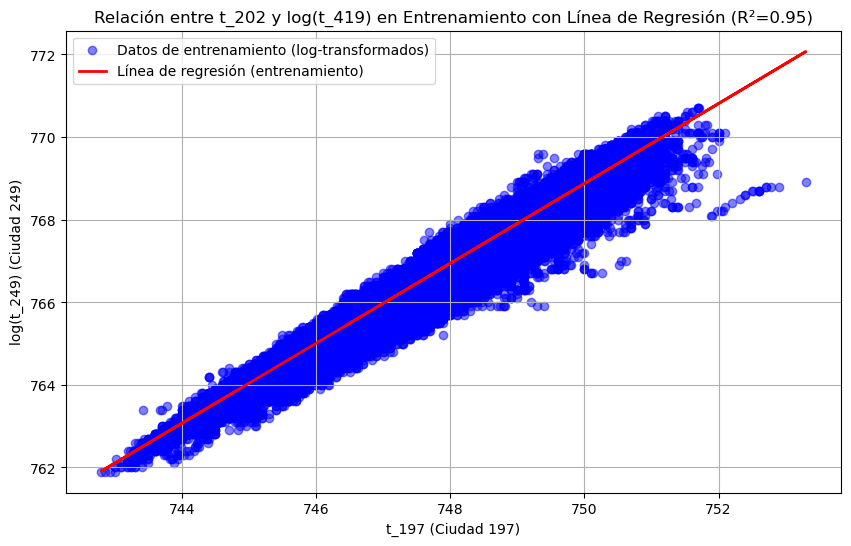

In [22]:
# Modelo de 202 y 419
ciudad_202 = df[df['codigo'] == 355].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 207].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']],
    lsuffix='_355', rsuffix='_207', how='inner'
)
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = merged_data[['pr_355']]
y = merged_data['pr_207']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

X_train_log = X_train
y_train_log = y_train

X_val_log = X_val
y_val_log = y_val

X_test_log = X_test
y_test_log = y_test

model_pr_355_207 = LinearRegression()
model_pr_355_207.fit(X_train_log, y_train_log)

y_pred_train = model_pr_355_207.predict(X_train_log)
y_pred_val = model_pr_355_207.predict(X_val_log)
y_pred_test = model_pr_355_207.predict(X_test_log)

def evaluar_modelo(y_real, y_pred, conjunto):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_pred)
    
    print(f"Conjunto {conjunto}")
    print(f"Error Absoluto Medio (MAE): {mae}")
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
    print(f"Precisión del modelo (R²): {r2}\n")

evaluar_modelo(y_train_log, y_pred_train, "Entrenamiento")
evaluar_modelo(y_val_log, y_pred_val, "Validación")
evaluar_modelo(y_test_log, y_pred_test, "Prueba")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_log, y_test_log, color='blue', alpha=0.5, label='Datos de entrenamiento (log-transformados)')
plt.plot(X_test_log, y_pred_test, color='red', linewidth=2, label='Línea de regresión (entrenamiento)')
plt.xlabel("t_197 (Ciudad 197)")
plt.ylabel("log(t_249) (Ciudad 249)")
plt.title(f"Relación entre t_202 y log(t_419) en Entrenamiento con Línea de Regresión (R²={r2_score(y_test_log, y_pred_test):.2f})")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Filtrar datos de las dos ciudades
ciudad_202 = df[df['codigo'] == 355].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 207].set_index('fecha_hora').sort_index()



# Combinar datos de las dos ciudades
merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']],
    lsuffix='_355', rsuffix='_207', how='inner'
)

# Calcular el promedio de velocidad del viento por hora para ambas ciudades
promedio_por_hora = merged_data.groupby('hora_355').agg({
    't_355': 'mean',
    'vv_207': 'mean'
})

# Separar características y variable objetivo
X = promedio_por_hora[["t_355"]]
y = promedio_por_hora['vv_207']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model_vv_355_207 = RandomForestRegressor(random_state=42)
model_vv_355_207.fit(X_train, y_train)

# Validación cruzada en los datos de entrenamiento
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_vv_355_207, X_train, y_train, cv=5, scoring='r2')
print("\nResultados de Validación Cruzada:")
print("R² promedio en validación cruzada:", cv_scores.mean())
print("Desviación estándar de R² en validación cruzada:", cv_scores.std())

# Evaluación en el conjunto de prueba
y_pred_test = model_vv_355_207.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nEvaluación del modelo Random Forest en el conjunto de prueba:")
print("Error Absoluto Medio (MAE):", mae_test)
print("Error Cuadrático Medio (MSE):", mse_test)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_test)
print("Coeficiente de Determinación (R²) en el conjunto de prueba:", r2_test)

# Evaluación en el conjunto de entrenamiento
y_pred_train = model_vv_355_207.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("\nPrecisión del modelo Random Forest (R²) en el conjunto de entrenamiento:", r2_train)


Resultados de Validación Cruzada:
R² promedio en validación cruzada: 0.1902400202503614
Desviación estándar de R² en validación cruzada: 1.3561769948510551

Evaluación del modelo Random Forest en el conjunto de prueba:
Error Absoluto Medio (MAE): 0.20211199821947518
Error Cuadrático Medio (MSE): 0.06049495280539121
Raíz del Error Cuadrático Medio (RMSE): 0.24595721742894883
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.6737618273469597

Precisión del modelo Random Forest (R²) en el conjunto de entrenamiento: 0.9769412154455976


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Filtrar datos de las dos ciudades
ciudad_202 = df[df['codigo'] == 355].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 207].set_index('fecha_hora').sort_index()

ciudad_202["calculo"] =(ciudad_202["vv"]/ciudad_202["pr"])
ciudad_419["calculo"] = (ciudad_419["vv"]/ciudad_419["pr"])

# Combinar datos de las dos ciudades
merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto','calculo']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto','calculo']],
    lsuffix='_355', rsuffix='_207', how='inner'
)

# Calcular el promedio de velocidad del viento por hora para ambas ciudades
promedio_por_hora = merged_data.groupby('hora_355').agg({
    't_355': 'mean',
    'dv_207': 'mean'
})

# Separar características y variable objetivo
X = promedio_por_hora[["t_355"]]
y = promedio_por_hora['dv_207']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model_dv_355_207 = RandomForestRegressor(random_state=42)
model_dv_355_207.fit(X_train, y_train)

# Validación cruzada en los datos de entrenamiento
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_dv_355_207, X_train, y_train, cv=5, scoring='r2')
print("\nResultados de Validación Cruzada:")
print("R² promedio en validación cruzada:", cv_scores.mean())
print("Desviación estándar de R² en validación cruzada:", cv_scores.std())

# Evaluación en el conjunto de prueba
y_pred_test = model_dv_355_207.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nEvaluación del modelo Random Forest en el conjunto de prueba:")
print("Error Absoluto Medio (MAE):", mae_test)
print("Error Cuadrático Medio (MSE):", mse_test)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_test)
print("Coeficiente de Determinación (R²) en el conjunto de prueba:", r2_test)

# Evaluación en el conjunto de entrenamiento
y_pred_train = model_dv_355_207.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("\nPrecisión del modelo Random Forest (R²) en el conjunto de entrenamiento:", r2_train)


Resultados de Validación Cruzada:
R² promedio en validación cruzada: -1.464420894034865
Desviación estándar de R² en validación cruzada: 4.115873642509615

Evaluación del modelo Random Forest en el conjunto de prueba:
Error Absoluto Medio (MAE): 5.982379906653603
Error Cuadrático Medio (MSE): 57.266221392760905
Raíz del Error Cuadrático Medio (RMSE): 7.567444839096014
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.43101253762458325

Precisión del modelo Random Forest (R²) en el conjunto de entrenamiento: 0.8927760651304605


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

ciudad_202 = df[df['codigo'] == 355].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 207].set_index('fecha_hora').sort_index()

# Combinar datos de las dos ciudades
merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max', 'día', 'mes', 'hora', 'año', 'minuto']],
    lsuffix='_355', rsuffix='_207', how='inner'
)

# Calcular el promedio de velocidad del viento por hora para ambas ciudades
promedio_por_hora = merged_data.groupby('hora_355').agg({
    'vv_355': 'mean',
    't_207': 'mean'
})

# Separar características y variable objetivo
X = promedio_por_hora[['t_207']]
y = promedio_por_hora['vv_355']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model_vv_355_207_v2 = RandomForestRegressor(random_state=42)
model_vv_355_207_v2.fit(X_train, y_train)

# Validación cruzada en los datos de entrenamiento
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_vv_355_207_v2, X_train, y_train, cv=5, scoring='r2')
print("\nResultados de Validación Cruzada:")
print("R² promedio en validación cruzada:", cv_scores.mean())
print("Desviación estándar de R² en validación cruzada:", cv_scores.std())

# Evaluación en el conjunto de prueba
y_pred_test = model_vv_355_207_v2.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nEvaluación del modelo Random Forest en el conjunto de prueba:")
print("Error Absoluto Medio (MAE):", mae_test)
print("Error Cuadrático Medio (MSE):", mse_test)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_test)
print("Coeficiente de Determinación (R²) en el conjunto de prueba:", r2_test)

# Evaluación en el conjunto de entrenamiento
y_pred_train = model_vv_355_207_v2.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("\nPrecisión del modelo Random Forest (R²) en el conjunto de entrenamiento:", r2_train)


Resultados de Validación Cruzada:
R² promedio en validación cruzada: 0.5814409471776775
Desviación estándar de R² en validación cruzada: 0.37916293445962096

Evaluación del modelo Random Forest en el conjunto de prueba:
Error Absoluto Medio (MAE): 0.22614192590611815
Error Cuadrático Medio (MSE): 0.06688764489294309
Raíz del Error Cuadrático Medio (RMSE): 0.25862645822294184
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.3221310451108407

Precisión del modelo Random Forest (R²) en el conjunto de entrenamiento: 0.9564449754756272


In [160]:
df_completo.shape

(24422604, 17)

In [26]:
df = df.sort_values(by=['codigo', 'fecha_hora']).reset_index(drop=True)
df['diferencia_tiempo'] = df.groupby('codigo')['fecha_hora'].diff().dt.total_seconds() / 60


In [27]:
df = df.sort_values(by=['codigo', 'fecha_hora']).reset_index(drop=True)

In [96]:
import numpy as np
def predecir_x(y, m, b):
    return (y - b) / m
#modelos_t = {
#    355: model_lr_355_207,
#    207: predecir_x,
#    197: model_lr_197_249,
#    249: predecir_x,
#    202: model_lr_202_419,
#    419: predecir_x
#}
pares = {
    355: (207,"y",np.sqrt),
    197: (249,"y",np.log),
    202 :(419,"y",np.log),
    419 :(202,"x",None),
    249 :(197,"x",None),
    207 :(355,"x",np.log),
}

In [28]:
import pandas as pd
import numpy as np
from datetime import timedelta

df = df.sort_values(by=['codigo', 'fecha_hora']).reset_index(drop=True)

df['diferencia_tiempo'] = df.groupby('codigo')['fecha_hora'].diff().dt.total_seconds() / 60

saltos_minuto = df[(df['diferencia_tiempo'] > 1) & (df['diferencia_tiempo'].notnull())]

nuevas_filas = []

for _, row in saltos_minuto.iterrows():
    fechas_faltantes = pd.date_range(
        start=row['fecha_hora'] - timedelta(minutes=row['diferencia_tiempo'] - 1),
        end=row['fecha_hora'] - timedelta(minutes=1),
        freq='1min'
    )
    nuevas_filas.extend([{
        'codigo': row['codigo'],
        'fecha_hora': fecha,
        'h': np.nan,
        't': np.nan,
        'pr': np.nan,
        'vv': np.nan,
        'vv_max': np.nan,
        'dv': np.nan,
        'dv_max': np.nan,
        'p': np.nan,
        'calidad': 3,
        'día': fecha.day,
        'mes': fecha.month,
        'año': fecha.year,
        'hora': fecha.hour,
        'minuto': fecha.minute,
        'diferencia_tiempo': 1 
    } for fecha in fechas_faltantes])
    
# Convertir las nuevas filas en un DataFrame
nuevas_filas_df = pd.DataFrame(nuevas_filas)

# Unir las nuevas filas al DataFrame original
df_completo = pd.concat([df, nuevas_filas_df]).sort_values(by=['codigo', 'fecha_hora']).reset_index(drop=True)

In [29]:
df_copy = df_completo.copy()

In [30]:
df_completo = df_copy.copy()

In [31]:
df_completo.shape

(14400930, 17)

In [32]:
df_completo[(df_completo["codigo"]==197)&(df_completo["fecha_hora"]>="2019-12-26 17:50:00")&(df_completo["fecha_hora"]<="2019-12-26 17:59:00")].sort_values(by=['fecha_hora']).reset_index(drop=True)

,codigo,fecha_hora,h,t,pr,vv,vv_max,dv,dv_max,p,calidad,día,mes,año,hora,minuto,diferencia_tiempo
0,197,2019-12-26 17:50:00,76.58,25.69,839.20,1.56,2.6,35.0,55.0,0.0,1,26,12,2019,17,50,1.0
1,197,2019-12-26 17:51:00,77.00,25.60,839.21,1.83,4.3,44.0,47.0,0.0,1,26,12,2019,17,51,1.0
2,197,2019-12-26 17:52:00,77.00,25.53,839.25,1.37,3.6,86.0,68.0,0.0,1,26,12,2019,17,52,1.0
3,197,2019-12-26 17:53:00,77.35,25.46,839.29,2.76,5.4,55.0,133.0,0.0,1,26,12,2019,17,53,1.0
4,197,2019-12-26 17:54:00,78.00,25.40,839.27,1.68,3.6,49.0,10.0,0.0,1,26,12,2019,17,54,1.0
5,197,2019-12-26 17:55:00,78.00,25.37,839.30,1.34,2.6,26.0,12.0,0.0,1,26,12,2019,17,55,1.0
6,197,2019-12-26 17:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,26,12,2019,17,56,1.0
7,197,2019-12-26 17:57:00,78.00,25.34,839.30,0.90,3.2,113.0,322.0,0.0,1,26,12,2019,17,57,2.0
8,197,2019-12-26 17:58:00,78.00,25.30,839.30,1.02,2.1,6.0,340.0,0.0,1,26,12,2019,17,58,1.0
9,197,2019-12-26 17:59:00,78.00,25.30,839.30,1.44,2.9,348.0,355.0,0.0,1,26,12,2019,17,59,1.0


In [33]:
df_completo.columns

Index(['codigo', 'fecha_hora', 'h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max',
       'p', 'calidad', 'día', 'mes', 'año', 'hora', 'minuto',
       'diferencia_tiempo'],
      dtype='object')

# Modelo imputacion faltantes   249 -> 197 es decir agregando a 197

In [34]:
faltantes_197 = df_completo[(df_completo['codigo'] == 197) & (df_completo['t'].isna())& (df_completo['h'].isna())& (df_completo['pr'].isna())& (df_completo['vv'].isna())].copy()
faltantes_197.loc[:, 'original_index'] = faltantes_197.index.copy()

diferencia_velocidad = float(df_completo[df_completo["codigo"]== 197]["vv_max"].mean()- df_completo["vv"].mean()) 
diferencia_dv = float(df_completo[df_completo["codigo"]== 197]["dv_max"].mean()- df_completo["dv"].mean()) 


if not faltantes_197.empty:
    ciudad_249 = df_completo[(df_completo['codigo'] == 249) & (~df_completo['t'].isna())& (~df_completo['h'].isna())& (~df_completo['pr'].isna())][['fecha_hora', 't', 'h', 'pr', 'vv', 'vv_max','dv','dv_max']].copy()

    imputacion_data = faltantes_197.merge(ciudad_249, on='fecha_hora', how='inner', suffixes=('_197', '_249'))


    imputacion_data.set_index('original_index', inplace=True)

    t_249_faltantes = imputacion_data['t_249'].values
    h_249_faltantes = imputacion_data['h_249'].values
    pr_249_faltantes = imputacion_data['pr_249'].values
    vv_249_faltantes = imputacion_data['vv_249'].values
    dv_249_faltantes = imputacion_data['dv_249'].values

    t_249_log = np.log(t_249_faltantes)
    t_197_log_pred = (t_249_log - model_lr_197_249.intercept_) / model_lr_197_249.coef_[0]
    t_197_pred = np.round(t_197_log_pred.flatten(), 2)

    h_249_log = np.log(h_249_faltantes)
    h_197_log_pred = (h_249_log - model_hr_197_249.intercept_) / model_hr_197_249.coef_[0]
    h_197_pred = np.round(np.exp(h_197_log_pred).flatten(), 2)

    pr_249_log = pr_249_faltantes
    pr_197_log_pred = (pr_249_log - model_pr_197_249.intercept_) / model_pr_197_249.coef_[0]
    pr_197_pred = np.round(pr_197_log_pred.flatten(), 2)

    vv_249_log = vv_249_faltantes.reshape(-1, 1)  
    vv_197_log_pred = model_vv_256_197.predict(vv_249_log)
    vv_197_pred = np.round(vv_197_log_pred.flatten(), 2)

    vv_max_197_log_pred = vv_197_pred + diferencia_velocidad
    vv_max_197_pred = np.round(vv_max_197_log_pred.flatten(), 2)

    dv_249_log = dv_249_faltantes.reshape(-1, 1)  
    dv_197_log_pred = model_dv_256_197.predict(dv_249_log)
    dv_197_pred = np.round(dv_197_log_pred.flatten(), 2)

    dv_max_197_log_pred = dv_197_pred + diferencia_dv
    dv_max_197_pred = np.round(dv_max_197_log_pred.flatten(), 2)

                   
    df_completo.loc[imputacion_data.index, 't'] = t_197_pred
    df_completo.loc[imputacion_data.index, 'h'] = h_197_pred
    df_completo.loc[imputacion_data.index, 'pr'] = pr_197_pred
    df_completo.loc[imputacion_data.index, 'vv'] = vv_197_pred
    df_completo.loc[imputacion_data.index, 'vv_max'] = vv_max_197_pred
    df_completo.loc[imputacion_data.index, 'dv'] = dv_197_pred
    df_completo.loc[imputacion_data.index, 'dv_max'] = dv_max_197_pred



    



df_completo[(df_completo["codigo"]==197)&(df_completo["fecha_hora"]>="2019-12-26 17:50:00")&(df_completo["fecha_hora"]<="2019-12-26 17:59:00")].sort_values(by=['fecha_hora']).reset_index(drop=True)

C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


,codigo,fecha_hora,h,t,pr,vv,vv_max,dv,dv_max,p,calidad,día,mes,año,hora,minuto,diferencia_tiempo
0,197,2019-12-26 17:50:00,76.58,25.69,839.20,1.56,2.60,35.00,55.00,0.0,1,26,12,2019,17,50,1.0
1,197,2019-12-26 17:51:00,77.00,25.60,839.21,1.83,4.30,44.00,47.00,0.0,1,26,12,2019,17,51,1.0
2,197,2019-12-26 17:52:00,77.00,25.53,839.25,1.37,3.60,86.00,68.00,0.0,1,26,12,2019,17,52,1.0
3,197,2019-12-26 17:53:00,77.35,25.46,839.29,2.76,5.40,55.00,133.00,0.0,1,26,12,2019,17,53,1.0
4,197,2019-12-26 17:54:00,78.00,25.40,839.27,1.68,3.60,49.00,10.00,0.0,1,26,12,2019,17,54,1.0
5,197,2019-12-26 17:55:00,78.00,25.37,839.30,1.34,2.60,26.00,12.00,0.0,1,26,12,2019,17,55,1.0
6,197,2019-12-26 17:56:00,78.21,24.50,840.56,1.22,1.35,236.47,279.74,NaN,3,26,12,2019,17,56,1.0
7,197,2019-12-26 17:57:00,78.00,25.34,839.30,0.90,3.20,113.00,322.00,0.0,1,26,12,2019,17,57,2.0
8,197,2019-12-26 17:58:00,78.00,25.30,839.30,1.02,2.10,6.00,340.00,0.0,1,26,12,2019,17,58,1.0
9,197,2019-12-26 17:59:00,78.00,25.30,839.30,1.44,2.90,348.00,355.00,0.0,1,26,12,2019,17,59,1.0


# Modelo imputacion faltantes 197 -> 249 es decir agregando a 249

In [35]:
df_completo[(df_completo["codigo"]==249) & (df_completo["fecha_hora"]>="2019-12-28 14:02:00")&(df_completo["fecha_hora"]<="2019-12-28 14:14:00")].sort_values(by=['fecha_hora'])

,codigo,fecha_hora,h,t,pr,vv,vv_max,dv,dv_max,p,calidad,día,mes,año,hora,minuto,diferencia_tiempo
7203227,249,2019-12-28 14:02:00,55.10,26.29,817.71,2.05,3.0,267.0,271.0,0.0,1,28,12,2019,14,2,1.0
7203228,249,2019-12-28 14:03:00,54.37,26.29,817.71,1.04,2.1,241.0,248.0,0.0,1,28,12,2019,14,3,1.0
7203229,249,2019-12-28 14:04:00,55.00,26.49,817.70,0.67,1.4,203.0,189.0,0.0,1,28,12,2019,14,4,1.0
7203230,249,2019-12-28 14:05:00,55.07,26.74,817.69,0.30,1.0,252.0,241.0,0.0,1,28,12,2019,14,5,1.0
7203231,249,2019-12-28 14:06:00,53.62,26.87,817.69,0.91,1.5,107.0,68.0,0.0,1,28,12,2019,14,6,1.0
7203232,249,2019-12-28 14:07:00,53.08,26.80,817.67,0.38,1.2,152.0,187.0,0.0,1,28,12,2019,14,7,1.0
7203233,249,2019-12-28 14:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,28,12,2019,14,8,1.0
7203234,249,2019-12-28 14:09:00,53.72,26.85,817.64,1.84,2.8,315.0,327.0,0.0,1,28,12,2019,14,9,2.0
7203235,249,2019-12-28 14:10:00,55.12,26.67,817.61,1.61,3.2,271.0,266.0,0.0,1,28,12,2019,14,10,1.0
7203236,249,2019-12-28 14:11:00,55.18,26.60,817.60,0.73,3.9,326.0,283.0,0.0,1,28,12,2019,14,11,1.0


In [36]:
faltantes_197 = df_completo[(df_completo['codigo'] == 249) & (df_completo['t'].isna())& (df_completo['h'].isna())& (df_completo['pr'].isna())& (df_completo['vv'].isna())].copy()
faltantes_197.loc[:, 'original_index'] = faltantes_197.index
diferencia_velocidad = float(df_completo[df_completo["codigo"]== 249]["vv_max"].mean()- df_completo["vv"].mean()) 
diferencia_dv = float(df_completo[df_completo["codigo"]== 249]["dv_max"].mean()- df_completo["dv"].mean()) 


if not faltantes_197.empty:
    ciudad_249 = df_completo[(df_completo['codigo'] == 197) & (~df_completo['t'].isna())& (~df_completo['h'].isna())& (~df_completo['pr'].isna())][['fecha_hora', 't', 'h', 'pr', 'vv', 'vv_max','dv','dv_max','p']]
    
    imputacion_data = faltantes_197.merge(ciudad_249, on='fecha_hora', how='inner', suffixes=( '_249','_197'))

    imputacion_data.set_index('original_index', inplace=True)
    
    t_249_faltantes = imputacion_data['t_197'].values
    h_249_faltantes = imputacion_data['h_197'].values
    pr_249_faltantes = imputacion_data['pr_197'].values
    vv_249_faltantes = imputacion_data['vv_197'].values
    dv_249_faltantes = imputacion_data['dv_197'].values


    t_249_features = t_249_faltantes.reshape(-1, 1)  
    t_197_pred_log = model_lr_197_249.predict(t_249_features)  
    t_197_pred = np.round(np.exp(t_197_pred_log).flatten(), 2) 
    
    h_249_log = np.log(h_249_faltantes.reshape(-1, 1))
    h_197_log_pred =  model_hr_197_249.predict(h_249_log)
    h_197_pred = np.round(np.exp(h_197_log_pred).flatten(), 2)

    pr_249_log = pr_249_faltantes.reshape(-1, 1)
    pr_197_log_pred =  model_pr_197_249.predict(pr_249_log)
    pr_197_pred = np.round(pr_197_log_pred.flatten(), 2)

    vv_249_log = vv_249_faltantes.reshape(-1, 1)  
    vv_197_log_pred = model_vv_256_197_v2.predict(vv_249_log)
    vv_197_pred = np.round(vv_197_log_pred.flatten(), 2)

    vv_max_197_log_pred = vv_197_pred + diferencia_velocidad
    vv_max_197_pred = np.round(vv_max_197_log_pred.flatten(), 2)

    dv_249_log = dv_249_faltantes.reshape(-1, 1)  
    dv_197_log_pred = model_dv_256_197_v2.predict(dv_249_log)
    dv_197_pred = np.round(dv_197_log_pred.flatten(), 2)

    dv_max_197_log_pred = dv_197_pred + diferencia_dv
    dv_max_197_pred = np.round(dv_max_197_log_pred.flatten(), 2)

                   
    df_completo.loc[imputacion_data.index, 't'] = t_197_pred
    df_completo.loc[imputacion_data.index, 'h'] = h_197_pred
    df_completo.loc[imputacion_data.index, 'pr'] = pr_197_pred
    df_completo.loc[imputacion_data.index, 'vv'] = vv_197_pred
    df_completo.loc[imputacion_data.index, 'vv_max'] = vv_max_197_pred
    df_completo.loc[imputacion_data.index, 'dv'] = dv_197_pred
    df_completo.loc[imputacion_data.index, 'dv_max'] = dv_max_197_pred

df_completo[(df_completo["codigo"]==249) & (df_completo["fecha_hora"]>="2019-12-28 14:02:00")&(df_completo["fecha_hora"]<="2019-12-28 14:14:00")].sort_values(by=['fecha_hora'])

C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fit

,codigo,fecha_hora,h,t,pr,vv,vv_max,dv,dv_max,p,calidad,día,mes,año,hora,minuto,diferencia_tiempo
7203227,249,2019-12-28 14:02:00,55.10,26.29,817.71,2.05,3.00,267.00,271.00,0.0,1,28,12,2019,14,2,1.0
7203228,249,2019-12-28 14:03:00,54.37,26.29,817.71,1.04,2.10,241.00,248.00,0.0,1,28,12,2019,14,3,1.0
7203229,249,2019-12-28 14:04:00,55.00,26.49,817.70,0.67,1.40,203.00,189.00,0.0,1,28,12,2019,14,4,1.0
7203230,249,2019-12-28 14:05:00,55.07,26.74,817.69,0.30,1.00,252.00,241.00,0.0,1,28,12,2019,14,5,1.0
7203231,249,2019-12-28 14:06:00,53.62,26.87,817.69,0.91,1.50,107.00,68.00,0.0,1,28,12,2019,14,6,1.0
7203232,249,2019-12-28 14:07:00,53.08,26.80,817.67,0.38,1.20,152.00,187.00,0.0,1,28,12,2019,14,7,1.0
7203233,249,2019-12-28 14:08:00,57.93,27.20,816.86,1.68,1.89,169.61,196.44,NaN,3,28,12,2019,14,8,1.0
7203234,249,2019-12-28 14:09:00,53.72,26.85,817.64,1.84,2.80,315.00,327.00,0.0,1,28,12,2019,14,9,2.0
7203235,249,2019-12-28 14:10:00,55.12,26.67,817.61,1.61,3.20,271.00,266.00,0.0,1,28,12,2019,14,10,1.0
7203236,249,2019-12-28 14:11:00,55.18,26.60,817.60,0.73,3.90,326.00,283.00,0.0,1,28,12,2019,14,11,1.0


# Modelo imputacion faltantes 355 -> 207 es decir agregando a 207

In [37]:
faltantes_197 = df_completo[(df_completo['codigo'] == 207) & (df_completo['t'].isna())& (df_completo['h'].isna())& (df_completo['pr'].isna())& (df_completo['vv'].isna())].copy()
faltantes_197.loc[:, 'original_index'] = faltantes_197.index
diferencia_velocidad = float(df_completo[df_completo["codigo"]== 207]["vv_max"].mean()- df_completo["vv"].mean()) 
diferencia_dv = float(df_completo[df_completo["codigo"]== 207]["dv_max"].mean()- df_completo["dv"].mean()) 


if not faltantes_197.empty:
    ciudad_249 = df_completo[(df_completo['codigo'] == 355) & (~df_completo['t'].isna())& (~df_completo['h'].isna())& (~df_completo['pr'].isna())][['fecha_hora', 't', 'h', 'pr', 'vv', 'vv_max','dv','dv_max']]
    
    imputacion_data = faltantes_197.merge(ciudad_249, on='fecha_hora', how='inner', suffixes=( '_207','_355'))

    imputacion_data.set_index('original_index', inplace=True)
    
    t_249_faltantes = imputacion_data['t_355'].values
    h_249_faltantes = imputacion_data['h_355'].values
    pr_249_faltantes = imputacion_data['pr_355'].values
    vv_249_faltantes = imputacion_data['vv_355'].values
    dv_249_faltantes = imputacion_data['dv_355'].values



    t_249_features =np.log( t_249_faltantes).reshape(-1, 1)  
    t_197_pred_log = model_lr_355_207.predict(t_249_features)  
    t_197_pred = np.round((t_197_pred_log ** 2).flatten(), 2)  
    # aaa
    
    h_249_log = np.log(h_249_faltantes.reshape(-1, 1))
    h_197_log_pred =  model_hr_355_207.predict(h_249_log)
    h_197_pred = np.round(np.exp(h_197_log_pred).flatten(), 2)

    pr_249_log = pr_249_faltantes.reshape(-1, 1)
    pr_197_log_pred =  model_pr_355_207.predict(pr_249_log)
    pr_197_pred = np.round(pr_197_log_pred.flatten(), 2)

    vv_249_log = t_249_faltantes.reshape(-1, 1)  
    vv_197_log_pred = model_vv_355_207.predict(vv_249_log)
    vv_197_pred = np.round(vv_197_log_pred.flatten(), 2)

    vv_max_197_log_pred = vv_197_pred + diferencia_velocidad
    vv_max_197_pred = np.round(vv_max_197_log_pred.flatten(), 2)

    #dv_249_log = dv_249_faltantes.reshape(-1, 1)  
    #dv_197_log_pred = model_dv_256_197_v2.predict(dv_249_log)
    #dv_197_pred = np.round(dv_197_log_pred.flatten(), 2)

    #dv_max_197_log_pred = dv_197_pred + diferencia_dv
    #dv_max_197_pred = np.round(dv_max_197_log_pred.flatten(), 2)

                   
    df_completo.loc[imputacion_data.index, 't'] = t_197_pred
    df_completo.loc[imputacion_data.index, 'h'] = h_197_pred
    df_completo.loc[imputacion_data.index, 'pr'] = pr_197_pred
    df_completo.loc[imputacion_data.index, 'vv'] = vv_197_pred
    df_completo.loc[imputacion_data.index, 'vv_max'] = vv_max_197_pred
    #df_completo.loc[imputacion_data.index, 'dv'] = dv_197_pred
    #df_completo.loc[imputacion_data.index, 'dv_max'] = dv_max_197_pred



C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [38]:
faltantes_197 = df_completo[(df_completo['codigo'] == 355) & (df_completo['t'].isna())& (df_completo['h'].isna())& (df_completo['pr'].isna())& (df_completo['vv'].isna())].copy()
faltantes_197.loc[:, 'original_index'] = faltantes_197.index
diferencia_velocidad = float(df_completo[df_completo["codigo"]== 355]["vv_max"].mean()- df_completo["vv"].mean()) 
diferencia_dv = float(df_completo[df_completo["codigo"]== 355]["dv_max"].mean()- df_completo["dv"].mean()) 


if not faltantes_197.empty:
    ciudad_249 = df_completo[(df_completo['codigo'] == 207) & (~df_completo['t'].isna())& (~df_completo['h'].isna())& (~df_completo['pr'].isna())][['fecha_hora', 't', 'h', 'pr', 'vv', 'vv_max','dv','dv_max']]
    
    imputacion_data = faltantes_197.merge(ciudad_249, on='fecha_hora', how='inner', suffixes=( '_355','_207'))

    imputacion_data.set_index('original_index', inplace=True)
    
    t_249_faltantes = imputacion_data['t_207'].values
    h_249_faltantes = imputacion_data['h_207'].values
    pr_249_faltantes = imputacion_data['pr_207'].values
    vv_249_faltantes = imputacion_data['vv_207'].values
    #dv_249_faltantes = imputacion_data['dv_207'].values


    t_249_log = np.sqrt(t_249_faltantes)
    t_197_log_pred = (t_249_log - model_lr_355_207.intercept_) / model_lr_355_207.coef_[0]
    t_197_pred = np.round(np.exp(t_197_log_pred).flatten(), 2)


    h_249_log = np.log(h_249_faltantes)
    h_197_log_pred = (h_249_log - model_hr_355_207.intercept_) / model_hr_355_207.coef_[0]
    h_197_pred = np.round(np.exp(h_197_log_pred).flatten(), 2)

    pr_249_log = np.log(pr_249_faltantes)
    pr_197_log_pred = (pr_249_log - model_pr_355_207.intercept_) / model_pr_355_207.coef_[0]
    pr_197_pred = np.round(np.exp(pr_197_log_pred).flatten(), 2)

    vv_249_log = t_249_faltantes.reshape(-1, 1)  
    vv_197_log_pred = model_vv_355_207_v2.predict(vv_249_log)
    vv_197_pred = np.round(vv_197_log_pred.flatten(), 2)

    vv_max_197_log_pred = vv_197_pred + diferencia_velocidad
    vv_max_197_pred = np.round(vv_max_197_log_pred.flatten(), 2)

    #dv_249_log = dv_249_faltantes.reshape(-1, 1)  
    #dv_197_log_pred = model_dv_256_197_v2.predict(dv_249_log)
    #dv_197_pred = np.round(dv_197_log_pred.flatten(), 2)

    #dv_max_197_log_pred = dv_197_pred + diferencia_dv
    #dv_max_197_pred = np.round(dv_max_197_log_pred.flatten(), 2)

                   
    df_completo.loc[imputacion_data.index, 't'] = t_197_pred
    df_completo.loc[imputacion_data.index, 'h'] = h_197_pred
    df_completo.loc[imputacion_data.index, 'pr'] = pr_197_pred
    df_completo.loc[imputacion_data.index, 'vv'] = vv_197_pred
    df_completo.loc[imputacion_data.index, 'vv_max'] = vv_max_197_pred
    #df_completo.loc[imputacion_data.index, 'dv'] = dv_197_pred
    #df_completo.loc[imputacion_data.index, 'dv_max'] = dv_max_197_pred

C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Modelo imputacion faltantes 202 -> 419 es decir agregando a 207

In [39]:
faltantes_197 = df_completo[(df_completo['codigo'] == 419) & (df_completo['t'].isna())& (df_completo['h'].isna())& (df_completo['pr'].isna())& (df_completo['vv'].isna())].copy()
faltantes_197.loc[:, 'original_index'] = faltantes_197.index
diferencia_velocidad = float(df_completo[df_completo["codigo"]== 419]["vv_max"].mean()- df_completo["vv"].mean()) 
diferencia_dv = float(df_completo[df_completo["codigo"]== 419]["dv_max"].mean()- df_completo["dv"].mean()) 


if not faltantes_197.empty:
    ciudad_249 = df_completo[(df_completo['codigo'] == 202) & (~df_completo['t'].isna())& (~df_completo['h'].isna())& (~df_completo['pr'].isna())][['fecha_hora', 't', 'h', 'pr', 'vv', 'vv_max','dv','dv_max','p']]
    imputacion_data = faltantes_197.merge(ciudad_249, on='fecha_hora', how='inner', suffixes=( '_419','_202'))

    imputacion_data.set_index('original_index', inplace=True)
    t_249_faltantes = imputacion_data['t_202'].values
    h_249_faltantes = imputacion_data['h_202'].values
    pr_249_faltantes = imputacion_data['pr_202'].values
    vv_249_faltantes = imputacion_data['vv_202'].values
    dv_249_faltantes = imputacion_data['dv_202'].values


    t_249_features = t_249_faltantes.reshape(-1, 1)  
    t_197_pred_log = model_lr_202_419.predict(t_249_features)  
    t_197_pred = np.round(np.exp(t_197_pred_log).flatten(), 2) 
    
    h_249_log = np.log(h_249_faltantes.reshape(-1, 1))
    h_197_log_pred =  model_hr_202_419.predict(h_249_log)
    h_197_pred = np.round(((h_197_log_pred**2)).flatten(), 2)

    pr_249_log = pr_249_faltantes.reshape(-1, 1)
    pr_197_log_pred =  model_pr_202_419.predict(pr_249_log)
    pr_197_pred = np.round(pr_197_log_pred.flatten(), 2)

    vv_249_log = vv_249_faltantes.reshape(-1, 1)  
    vv_197_log_pred = model_vv_202_419_v2.predict(vv_249_log)
    vv_197_pred = np.round(vv_197_log_pred.flatten(), 2)

    vv_max_197_log_pred = vv_197_pred + diferencia_velocidad
    vv_max_197_pred = np.round(vv_max_197_log_pred.flatten(), 2)

    #dv_249_log = dv_249_faltantes.reshape(-1, 1)  
    #dv_197_log_pred = model_dv_256_197_v2.predict(dv_249_log)
    #dv_197_pred = np.round(dv_197_log_pred.flatten(), 2)

    #dv_max_197_log_pred = dv_197_pred + diferencia_dv
    #dv_max_197_pred = np.round(dv_max_197_log_pred.flatten(), 2)

                   
    df_completo.loc[imputacion_data.index, 't'] = t_197_pred
    df_completo.loc[imputacion_data.index, 'h'] = h_197_pred
    df_completo.loc[imputacion_data.index, 'pr'] = pr_197_pred
    df_completo.loc[imputacion_data.index, 'vv'] = vv_197_pred
    #df_completo.loc[imputacion_data.index, 'vv_max'] = vv_max_197_pred
    #df_completo.loc[imputacion_data.index, 'dv'] = dv_197_pred
    #df_completo.loc[imputacion_data.index, 'dv_max'] = dv_max_197_pred

C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [40]:
df_completo_v = df_completo[["codigo","fecha_hora",	"h",	"t",	"pr",	"vv",	"vv_max",	"dv",	"dv_max",	"calidad","día","mes","año",	"hora"	,"minuto"]]
df_197_sin_nulos = df_completo_v.dropna()

df_197_sin_nulos = df_197_sin_nulos.sort_values(by=['codigo', 'fecha_hora']).reset_index(drop=True)
df_197_sin_nulos['diferencia_tiempo'] = df_197_sin_nulos.groupby('codigo')['fecha_hora'].diff().dt.total_seconds() / 60 
saltos_minuto = df_197_sin_nulos[(df_197_sin_nulos['diferencia_tiempo'] != 1) & (df_197_sin_nulos['diferencia_tiempo'].notnull())]
print("Registros que no están en intervalos de un minuto:")
saltos_minuto[['codigo', 'fecha_hora', 'diferencia_tiempo']]

Registros que no están en intervalos de un minuto:


,codigo,fecha_hora,diferencia_tiempo
642,197,2019-12-27 07:21:00,280.0
1501,197,2019-12-27 22:40:00,61.0
1536,197,2019-12-28 00:11:00,57.0
1642,197,2019-12-28 05:04:00,188.0
1697,197,2019-12-28 07:37:00,99.0
...,...,...,...
13697391,419,2024-07-18 08:30:00,2.0
13697456,419,2024-07-18 09:36:00,2.0
13697488,419,2024-07-18 10:09:00,2.0
13697520,419,2024-07-18 10:42:00,2.0


In [41]:
saltos_mayores_por_codigo = saltos_minuto.sort_values(by=['codigo', 'diferencia_tiempo'], ascending=[True, False]) \
                                         .drop_duplicates(subset=['codigo'], keep='first') \
                                         [['codigo', 'fecha_hora', 'diferencia_tiempo']]
saltos_mayores_por_codigo

,codigo,fecha_hora,diferencia_tiempo
89688,197,2020-03-01 22:11:00,1544.0
3051568,202,2021-04-13 14:18:00,4087.0
6581199,207,2023-12-12 14:14:00,121167.0
6928173,249,2020-03-01 22:11:00,1544.0
10846201,355,2023-06-08 16:13:00,21910.0
13205985,419,2023-07-28 15:30:00,31966.0


In [226]:
saltos_mayores_por_codigo = saltos_minuto.sort_values(by=['codigo', 'diferencia_tiempo'], ascending=[True, False]) \
                                         .drop_duplicates(subset=['codigo'], keep='first') \
                                         [['codigo', 'fecha_hora', 'diferencia_tiempo']]
saltos_mayores_por_codigo

,codigo,fecha_hora,diferencia_tiempo
89686,197,2020-03-01 22:11:00,1544.0
3051562,202,2021-04-13 14:18:00,4087.0
6581189,207,2023-12-12 14:14:00,121167.0
6928159,249,2020-03-01 22:11:00,1544.0
10846183,355,2023-06-08 16:13:00,21910.0
13205963,419,2023-07-28 15:30:00,31966.0


In [42]:
df_completo['fecha_hora'] = df_completo['fecha_hora'].dt.floor('15min')
df_completo

,codigo,fecha_hora,h,t,pr,vv,vv_max,dv,dv_max,p,calidad,día,mes,año,hora,minuto,diferencia_tiempo
0,197,2019-12-26 16:00:00,62.23,28.87,838.10,0.99,1.7,229.0,244.0,0.0,1,26,12,2019,16,0,NaN
1,197,2019-12-26 16:00:00,61.77,28.78,838.11,2.25,3.8,189.0,198.0,0.0,1,26,12,2019,16,1,1.0
2,197,2019-12-26 16:00:00,61.60,28.70,838.15,1.22,3.5,181.0,189.0,0.0,1,26,12,2019,16,2,1.0
3,197,2019-12-26 16:00:00,61.92,28.70,838.19,1.12,3.2,216.0,239.0,0.0,1,26,12,2019,16,3,1.0
4,197,2019-12-26 16:00:00,61.38,28.64,838.20,1.85,3.0,217.0,231.0,0.0,1,26,12,2019,16,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14400925,419,2024-07-19 10:30:00,62.09,24.59,851.69,2.33,3.1,326.0,329.0,0.0,1,19,7,2024,10,30,1.0
14400926,419,2024-07-19 10:30:00,62.66,24.45,851.70,1.88,2.4,327.0,341.0,0.0,1,19,7,2024,10,31,1.0
14400927,419,2024-07-19 10:30:00,63.00,24.42,851.71,0.93,2.2,338.0,336.0,0.0,1,19,7,2024,10,32,1.0
14400928,419,2024-07-19 10:30:00,63.00,24.51,851.71,1.27,2.2,341.0,326.0,0.0,1,19,7,2024,10,33,1.0


In [43]:
df_completo = df_completo.sort_values(by=['codigo', 'fecha_hora'])

grouped = df_completo.groupby(['codigo', 'fecha_hora']).agg(
    h_promedio=('h', 'mean'),
    h_std=('h', 'std'),
    h_sum=('h', 'sum'), 
    t_promedio=('t', 'mean'),
    t_std=('t', 'std'),
    t_sum=('t', 'sum'), 
    pr_promedio=('pr', 'mean'),
    pr_std=('pr', 'std'),
    pr_sum=('pr', 'sum'),  
    vv_promedio=('vv', 'mean'),
    vv_std=('vv', 'std'),
    vv_sum=('vv', 'sum'),  
    vv_max_promedio=('vv_max', 'mean'),
    vv_max_std=('vv_max', 'std'),
    vv_max_sum=('vv_max', 'sum')  
)

# Reiniciar el índice para que sea un DataFrame limpio
grouped = grouped.reset_index()


In [44]:
grouped.columns

Index(['codigo', 'fecha_hora', 'h_promedio', 'h_std', 'h_sum', 't_promedio',
       't_std', 't_sum', 'pr_promedio', 'pr_std', 'pr_sum', 'vv_promedio',
       'vv_std', 'vv_sum', 'vv_max_promedio', 'vv_max_std', 'vv_max_sum'],
      dtype='object')

In [48]:
import pandas as pd

# Asegúrate de que 'fecha_hora' sea de tipo datetime
grouped['fecha_hora'] = pd.to_datetime(grouped['fecha_hora'])

grouped = grouped.sort_values(by=['codigo', 'fecha_hora'])

columns_to_interpolate = [
    'h_promedio', 'h_std', 'h_sum', 't_promedio', 't_std', 't_sum',
    'pr_promedio', 'pr_std', 'pr_sum', 'vv_promedio', 'vv_std',
    'vv_sum', 'vv_max_promedio', 'vv_max_std', 'vv_max_sum'
]

for col in columns_to_interpolate:
    grouped[col] = (
        grouped.groupby('codigo')[col]  # Agrupar por 'codigo'
        .apply(lambda group: group.interpolate(method='linear'))  # Interpolación lineal
        .reset_index(level=0, drop=True)  # Asegurar índice compatible
    )

print(grouped.head())


   codigo          fecha_hora  h_promedio     h_std   h_sum  t_promedio  \
0     197 2019-12-26 16:00:00   60.591333  1.783259  908.87   28.622000   
1     197 2019-12-26 16:15:00   56.948000  0.721172  854.22   28.514000   
2     197 2019-12-26 16:30:00   57.032000  0.073114  855.48   28.255333   
3     197 2019-12-26 16:45:00   61.228000  3.486194  918.42   27.888000   
4     197 2019-12-26 17:00:00   64.352667  0.393745  965.29   27.477333   

      t_std   t_sum  pr_promedio    pr_std    pr_sum  vv_promedio    vv_std  \
0  0.103593  429.33   838.194000  0.049252  12572.91     1.770667  0.696783   
1  0.108746  427.71   838.414000  0.067908  12576.21     1.880000  0.734759   
2  0.071501  423.83   838.523333  0.036775  12577.85     1.568000  0.761476   
3  0.250747  418.32   838.656000  0.050681  12579.84     1.845333  0.771528   
4  0.053381  412.16   838.630000  0.041576  12579.45     1.084000  0.868404   

   vv_sum  vv_max_promedio  vv_max_std  vv_max_sum  
0   26.56         3.3

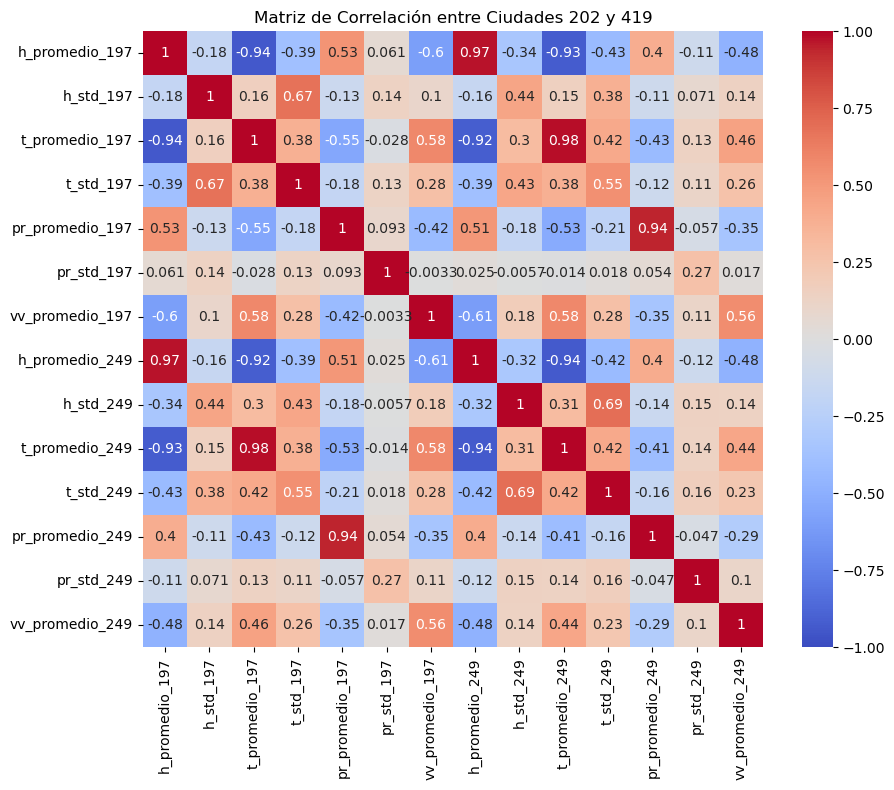

In [46]:
ciudad_202 = grouped[grouped['codigo'] == 197].set_index('fecha_hora').sort_index()
ciudad_419 = grouped[grouped['codigo'] == 249].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[[ 'h_promedio', 'h_std',
       't_promedio', 't_std','pr_promedio','pr_std','vv_promedio']].join(
    ciudad_419[[ 'h_promedio', 'h_std',
       't_promedio', 't_std','pr_promedio','pr_std','vv_promedio']],
    lsuffix='_197', rsuffix='_249', how='inner'
)
merged_data = merged_data.dropna()
merged_data
correlation_matrix = merged_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Ciudades 202 y 419")
plt.show()

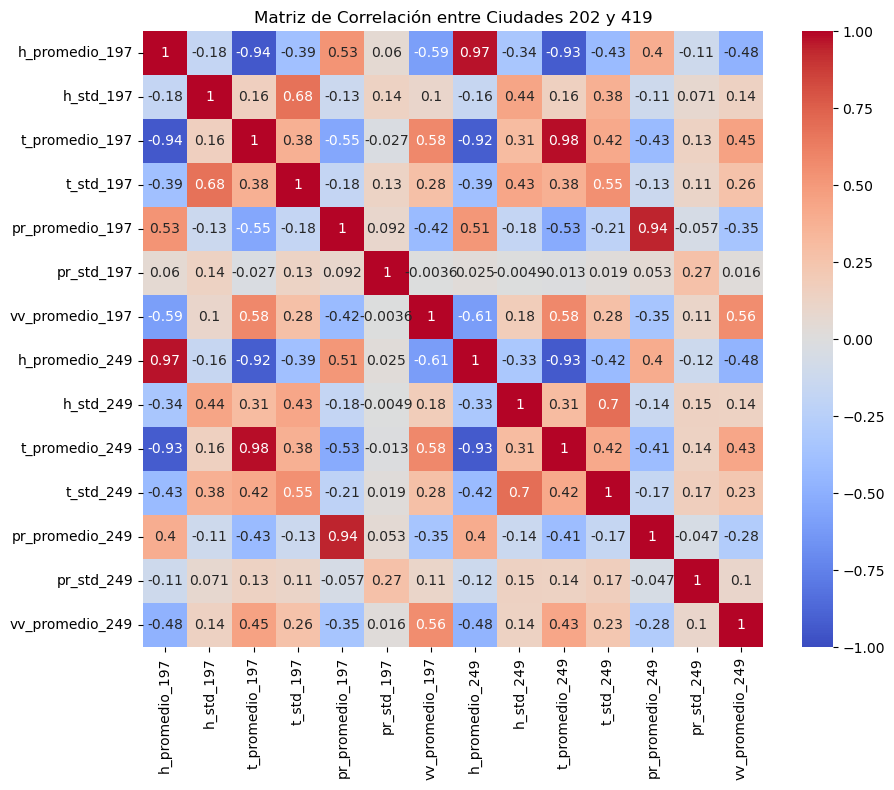

In [50]:
ciudad_202 = grouped[grouped['codigo'] == 197].set_index('fecha_hora').sort_index()
ciudad_419 = grouped[grouped['codigo'] == 249].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[[ 'h_promedio', 'h_std',
       't_promedio', 't_std','pr_promedio','pr_std','vv_promedio']].join(
    ciudad_419[[ 'h_promedio', 'h_std',
       't_promedio', 't_std','pr_promedio','pr_std','vv_promedio']],
    lsuffix='_197', rsuffix='_249', how='inner'
)
merged_data = merged_data.dropna()
merged_data
correlation_matrix = merged_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Ciudades 202 y 419")
plt.show()

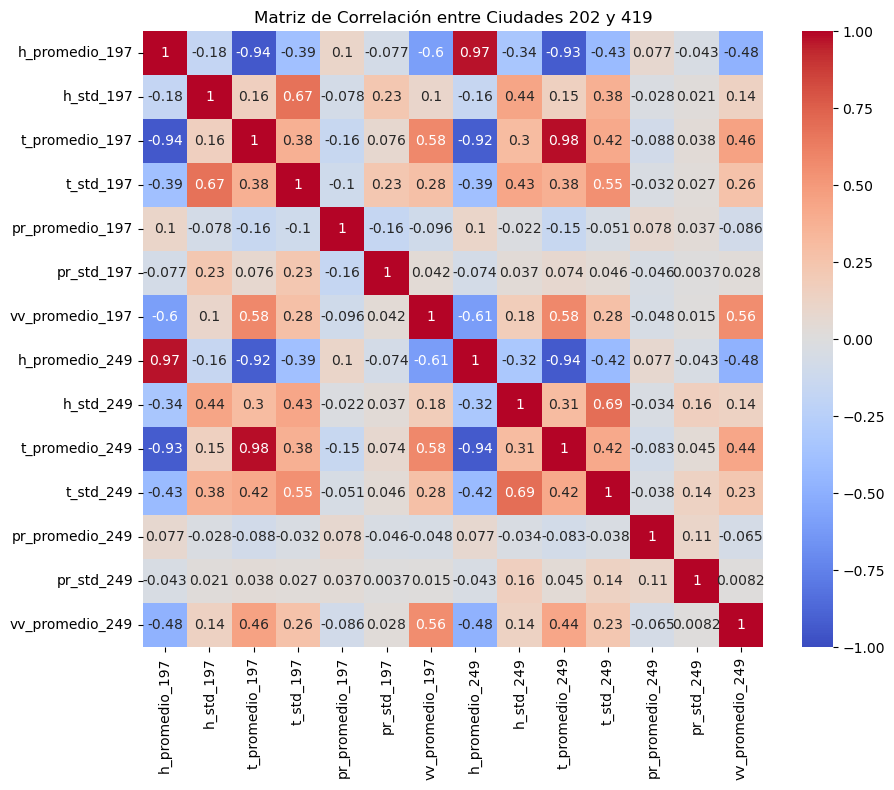

In [258]:
ciudad_202 = grouped[grouped['codigo'] == 197].set_index('fecha_hora_5min').sort_index()
ciudad_419 = grouped[grouped['codigo'] == 249].set_index('fecha_hora_5min').sort_index()

merged_data = ciudad_202[[ 'h_promedio', 'h_std',
       't_promedio', 't_std','pr_promedio','pr_std','vv_promedio']].join(
    ciudad_419[[ 'h_promedio', 'h_std',
       't_promedio', 't_std','pr_promedio','pr_std','vv_promedio']],
    lsuffix='_197', rsuffix='_249', how='inner'
)
merged_data = merged_data.dropna()
merged_data
correlation_matrix = merged_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Ciudades 202 y 419")
plt.show()

In [80]:
grouped = grouped.sort_values(by=['codigo', 'fecha_hora_5min']).reset_index(drop=True)

grouped['diferencia_tiempo'] = grouped.groupby('codigo')['fecha_hora_5min'].diff().dt.total_seconds() / 60

saltos_minuto = grouped[(grouped['diferencia_tiempo'] != 5) & (grouped['diferencia_tiempo'].notnull())]

intervalos_faltantes = (saltos_minuto['diferencia_tiempo'] - 5).sum() / 5

porcentaje_faltante = (intervalos_faltantes / len(grouped)) * 100

print(f"Intervalos faltantes (en incrementos de 5 minutos): {intervalos_faltantes}")
print(f"Porcentaje de intervalos faltantes: {porcentaje_faltante:.2f}%")

# Mostrar los registros con saltos en el tiempo
saltos_minuto = saltos_minuto[['codigo', 'fecha_hora_5min', 'diferencia_tiempo']]
print("Registros con intervalos irregulares:")
print(saltos_minuto)


Intervalos faltantes (en incrementos de 5 minutos): 2650603.0
Porcentaje de intervalos faltantes: 1154.71%
Registros con intervalos irregulares:
        codigo     fecha_hora_5min  diferencia_tiempo
1          197 2019-12-26 17:00:00               60.0
2          197 2019-12-26 18:00:00               60.0
3          197 2019-12-26 19:00:00               60.0
4          197 2019-12-26 20:00:00               60.0
5          197 2019-12-26 21:00:00               60.0
...        ...                 ...                ...
229542     419 2024-07-19 06:00:00               60.0
229543     419 2024-07-19 07:00:00               60.0
229544     419 2024-07-19 08:00:00               60.0
229545     419 2024-07-19 09:00:00               60.0
229546     419 2024-07-19 10:00:00               60.0

[229541 rows x 3 columns]


In [56]:
null_counts = grouped.isnull().sum()

print("Número de valores nulos por columna:")
print(null_counts)


Número de valores nulos por columna:
codigo             0
fecha_hora         0
h_promedio         0
h_std              0
h_sum              0
t_promedio         0
t_std              0
t_sum              0
pr_promedio        0
pr_std             0
pr_sum             0
vv_promedio        0
vv_std             0
vv_sum             0
vv_max_promedio    0
vv_max_std         0
vv_max_sum         0
dtype: int64


In [57]:
grouped

,codigo,fecha_hora,h_promedio,h_std,h_sum,t_promedio,t_std,t_sum,pr_promedio,pr_std,pr_sum,vv_promedio,vv_std,vv_sum,vv_max_promedio,vv_max_std,vv_max_sum
0,197,2019-12-26 16:00:00,60.591333,1.783259,908.87,28.622000,0.103593,429.33,838.194000,0.049252,12572.91,1.770667,0.696783,26.56,3.380000,1.040741,50.7
1,197,2019-12-26 16:15:00,56.948000,0.721172,854.22,28.514000,0.108746,427.71,838.414000,0.067908,12576.21,1.880000,0.734759,28.20,3.746667,1.109612,56.2
2,197,2019-12-26 16:30:00,57.032000,0.073114,855.48,28.255333,0.071501,423.83,838.523333,0.036775,12577.85,1.568000,0.761476,23.52,3.466667,1.079462,52.0
3,197,2019-12-26 16:45:00,61.228000,3.486194,918.42,27.888000,0.250747,418.32,838.656000,0.050681,12579.84,1.845333,0.771528,27.68,3.613333,1.348474,54.2
4,197,2019-12-26 17:00:00,64.352667,0.393745,965.29,27.477333,0.053381,412.16,838.630000,0.041576,12579.45,1.084000,0.868404,16.26,1.906667,1.129770,28.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960061,419,2024-07-19 09:30:00,71.722000,1.025749,1075.83,22.409333,0.128867,336.14,852.318000,0.031893,12784.77,2.108000,0.494689,31.62,2.933333,0.552484,44.0
960062,419,2024-07-19 09:45:00,67.688667,1.601784,1015.33,22.920667,0.316915,343.81,852.330000,0.044078,12784.95,1.637333,0.489730,24.56,2.733333,0.542042,41.0
960063,419,2024-07-19 10:00:00,64.669333,0.805468,970.04,23.826667,0.284119,357.40,852.110000,0.118743,12781.65,1.223333,0.613080,18.35,2.193333,0.638600,32.9
960064,419,2024-07-19 10:15:00,62.563333,1.400019,938.45,24.600000,0.270581,369.00,851.821333,0.118011,12777.32,1.182000,0.592804,17.73,2.114286,0.555888,29.6


In [58]:
grouped.to_csv('zoneCleaner/meteologica.csv', index=False)
